# '''
# Name       : Mansi Gupta
# E-Mail     : mansiit3042@gmail.com
# Contact    : +91-8076301568
# Learnbay HR Capstone assignment

'''

In [1]:
import time
import random
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# from sklearn.externals.six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
from matplotlib.legend_handler import HandlerLine2D
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data

data = pd.read_csv('HR_Employee_Attrition_Data.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Checking the rows and number of columns in the data set

data.shape

(2940, 35)

In [4]:
# Checking the columns

data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# Checking the information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [6]:
# Checking the missing values

data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# Checking the data types for the dataset

data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
#Get a count of the number of employee attrition, the number of employees that stayed (no) and the number that left (yes)

data['Attrition'].value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

In [10]:
#Print all of the object data types and their unique values

for column in data.columns:
    if data[column].dtype == object:
        print(data[column].value_counts())
        print('\n')

No     2466
Yes     474
Name: Attrition, dtype: int64


Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64


Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64


Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64


Male      1764
Female    1176
Name: Gender, dtype: int64


Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative    262
Manager                      204
Sales Representative         166
Research Director            160
Human Resources              104
Name: JobRole, dtype: int64


Married     1346
Single       940
Divorced     654
Name: MaritalStatus, dtype: int64


Y    2940
Name: Over18, dtype: int64


No  

In [11]:
data['EmployeeCount'].value_counts()

1    2940
Name: EmployeeCount, dtype: int64

In [12]:
data['EmployeeNumber'].value_counts()

2047    1
1082    1
1078    1
1076    1
1074    1
       ..
489     1
2536    1
487     1
2534    1
2049    1
Name: EmployeeNumber, Length: 2940, dtype: int64

In [13]:
data['Over18'].value_counts()

Y    2940
Name: Over18, dtype: int64

In [14]:
data['StandardHours'].value_counts()

80    2940
Name: StandardHours, dtype: int64

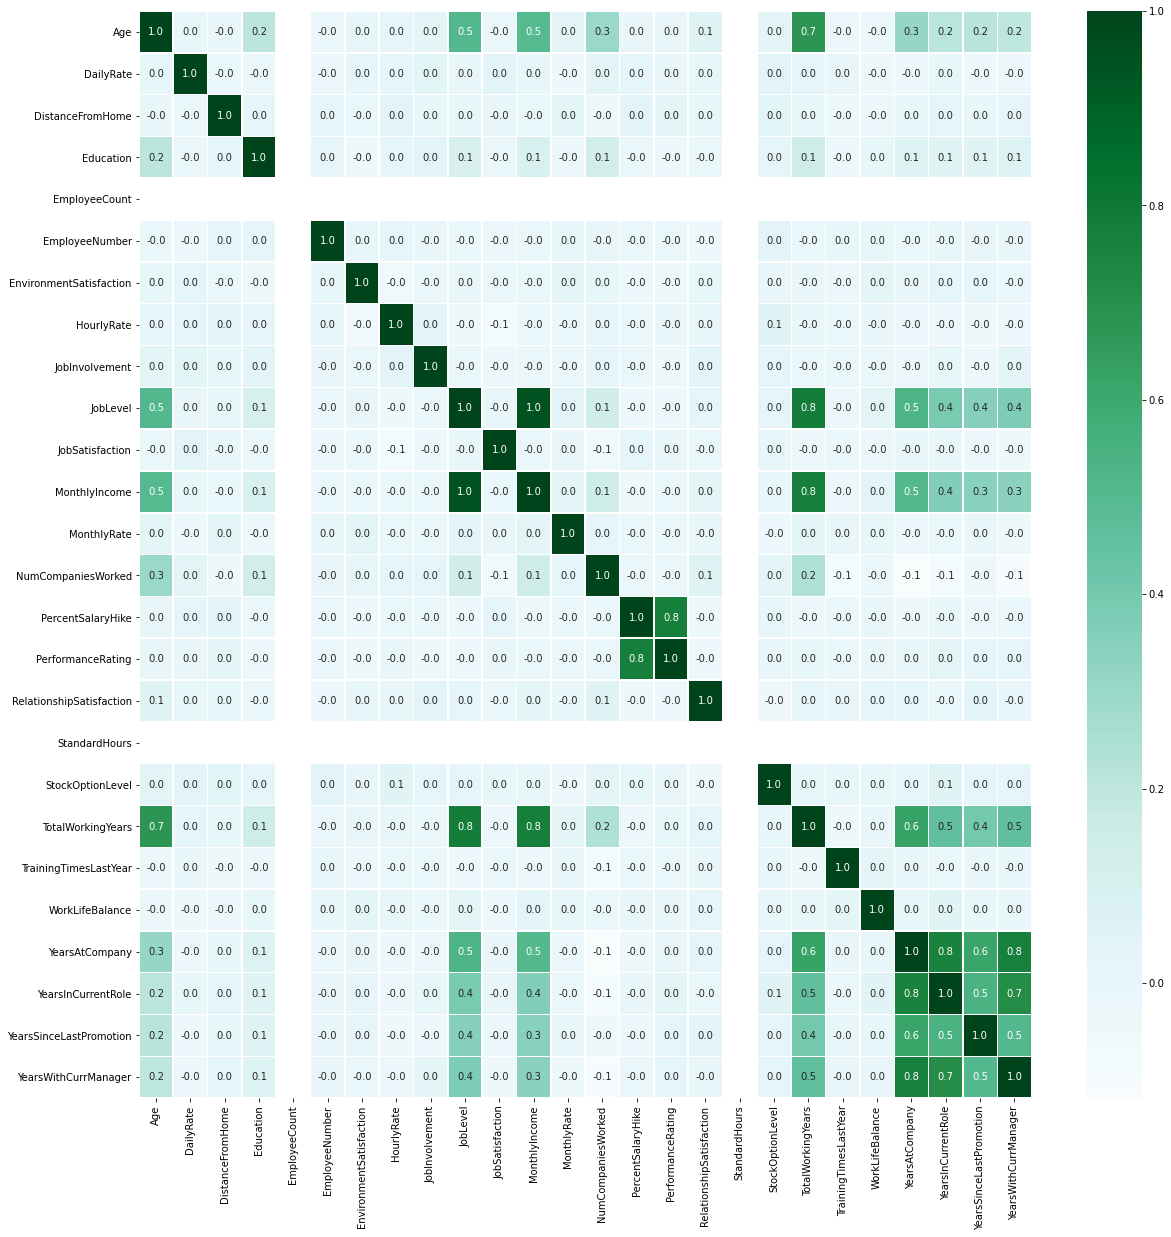

In [15]:
# Checking the correlation

plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,fmt= '.1f', cmap="BuGn")

In [16]:
# Drop the column having zero variance and having strong correlation

df=data.drop(columns = ['Over18','StandardHours','EmployeeNumber','EmployeeCount','JobLevel'],axis=1)
df.shape

(2940, 30)

In [17]:
# Getting data types for number or int.

ds = df.select_dtypes(include=[np.number])
ds.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,4,5993,19479,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,5130,24907,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,3,2090,2396,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,3,2909,23159,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,2,3468,16632,...,3,4,1,6,3,3,2,2,2,2


In [18]:
cols = ds.columns.to_list()
cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

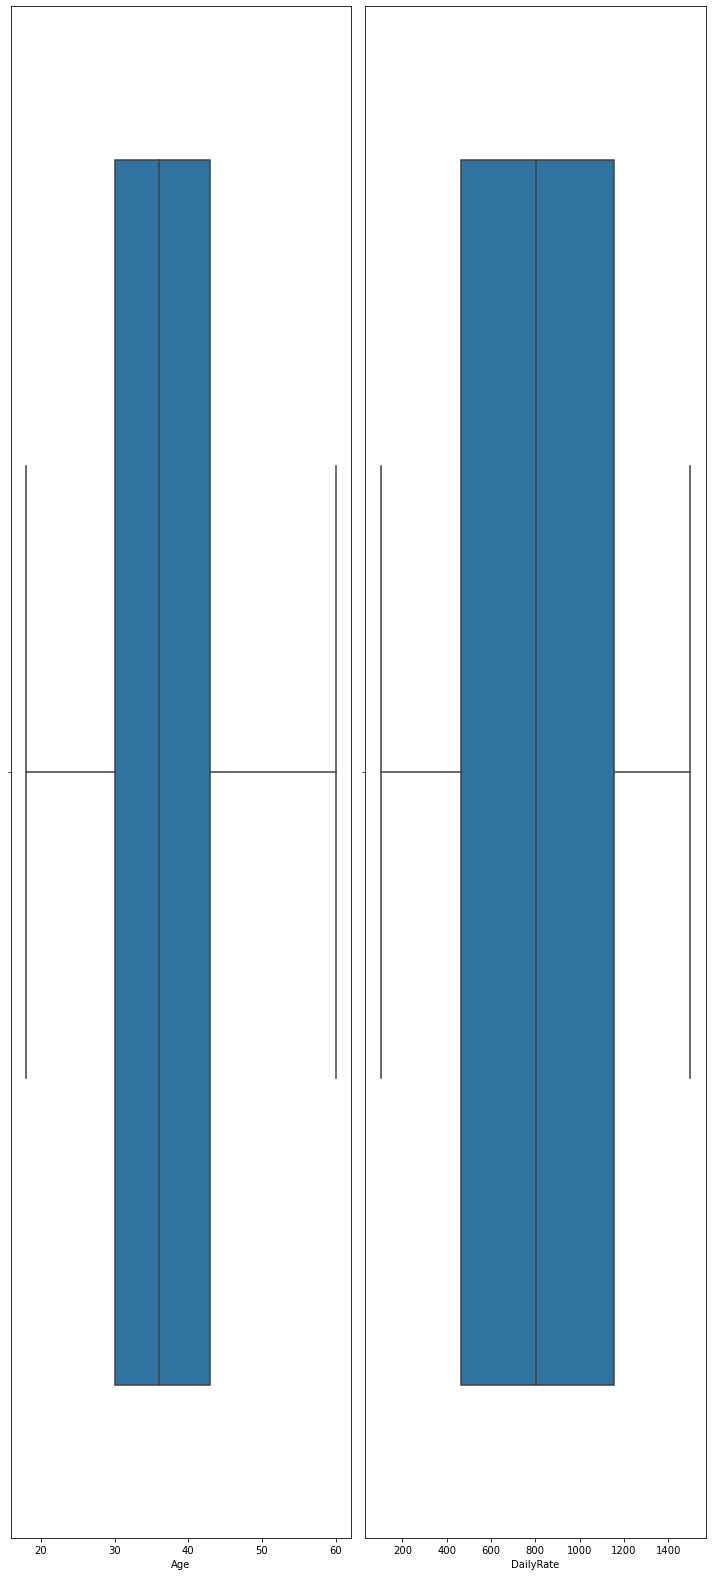

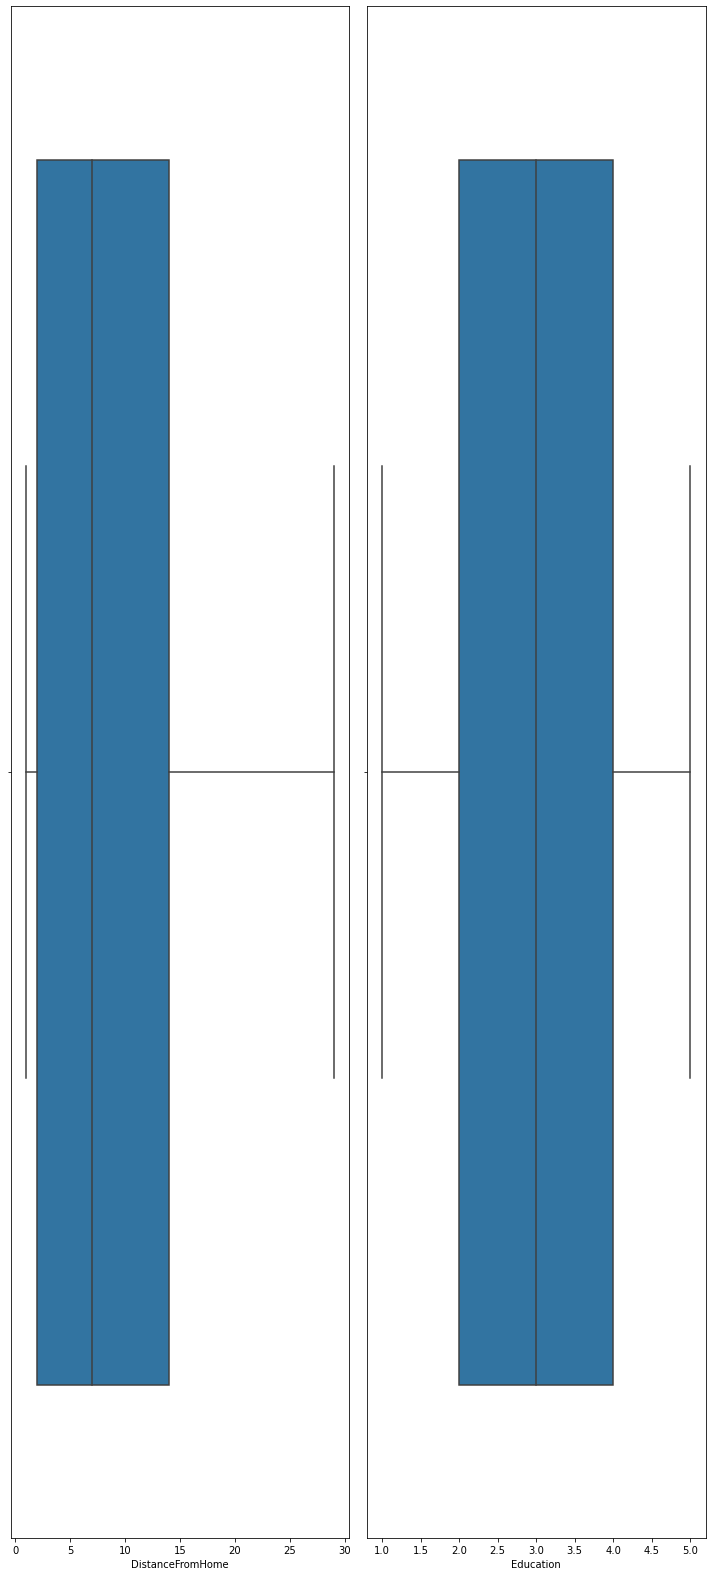

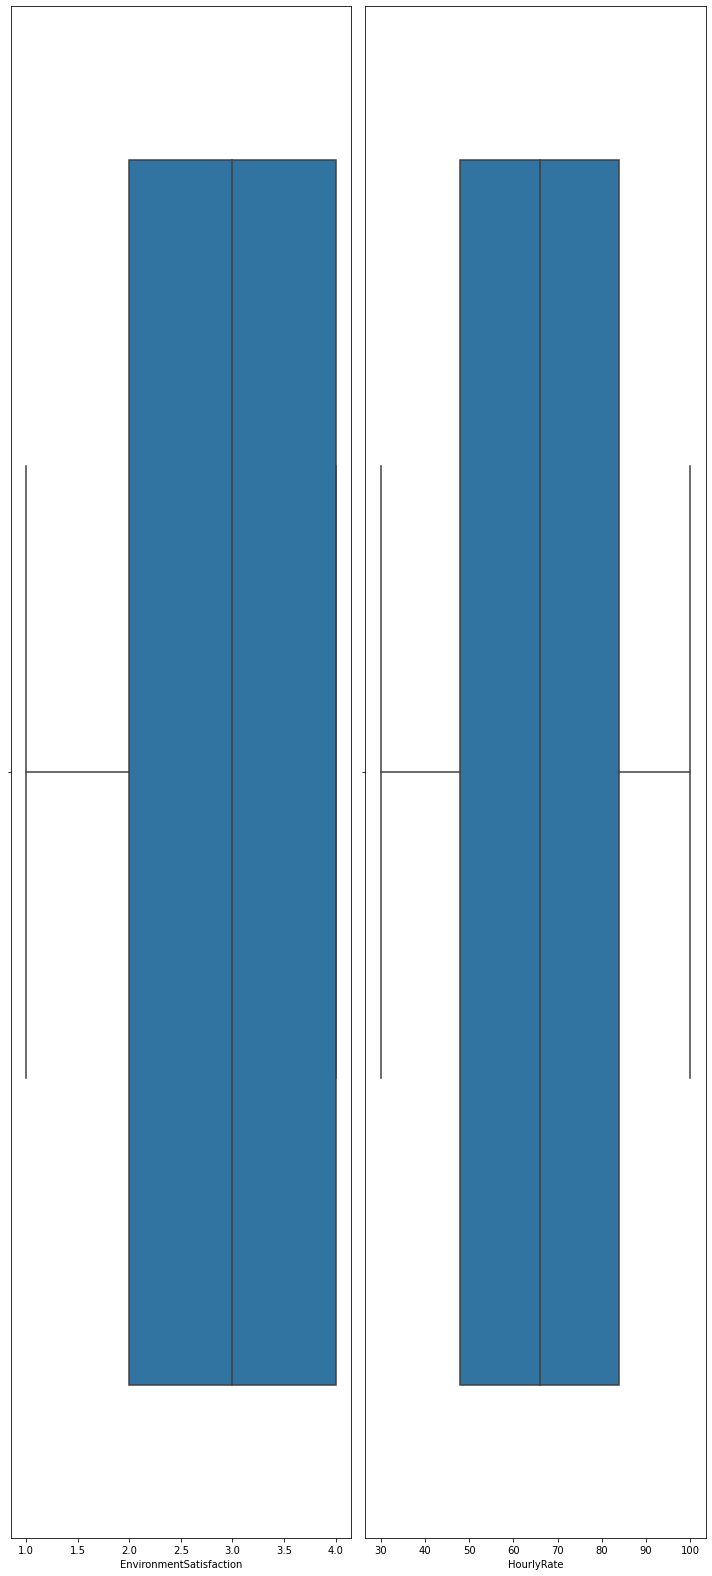

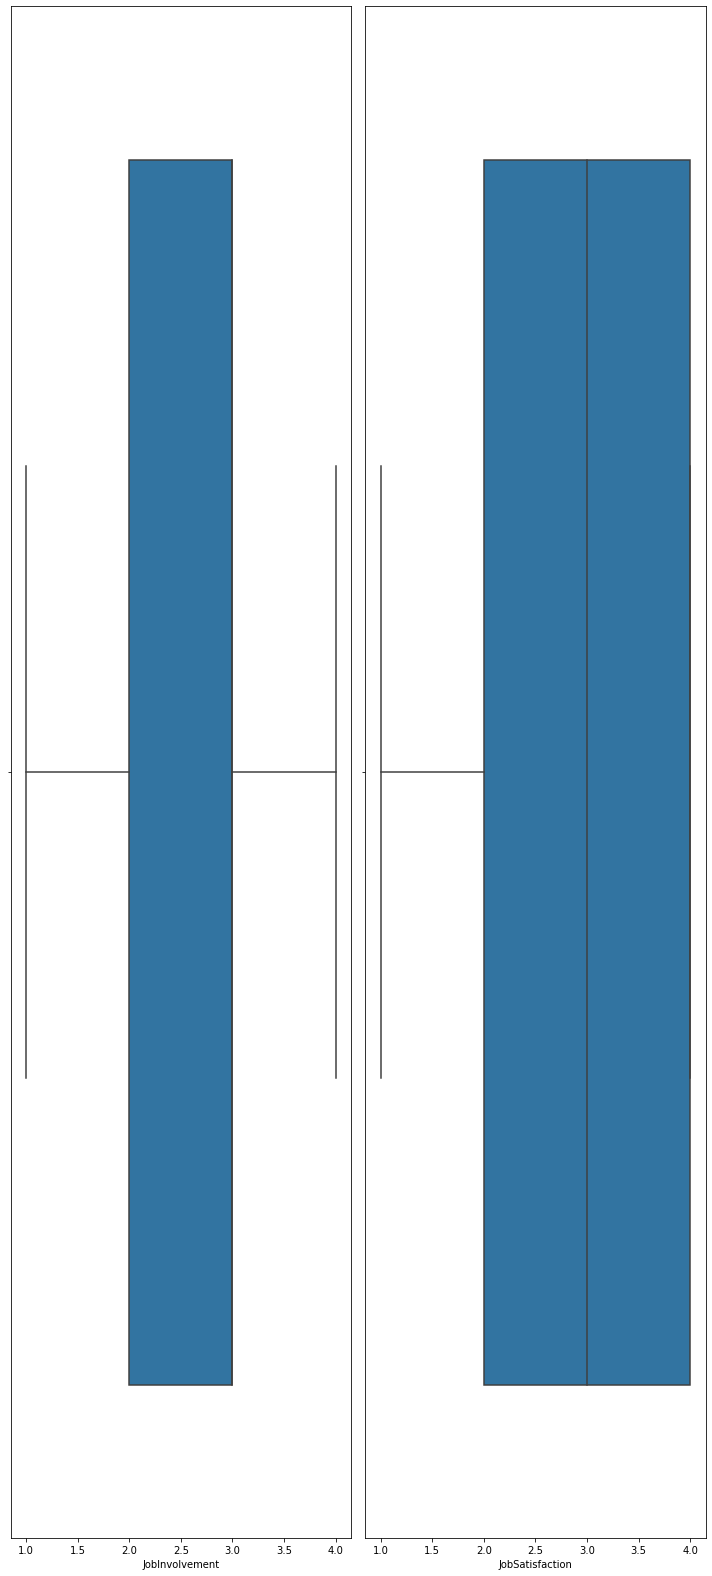

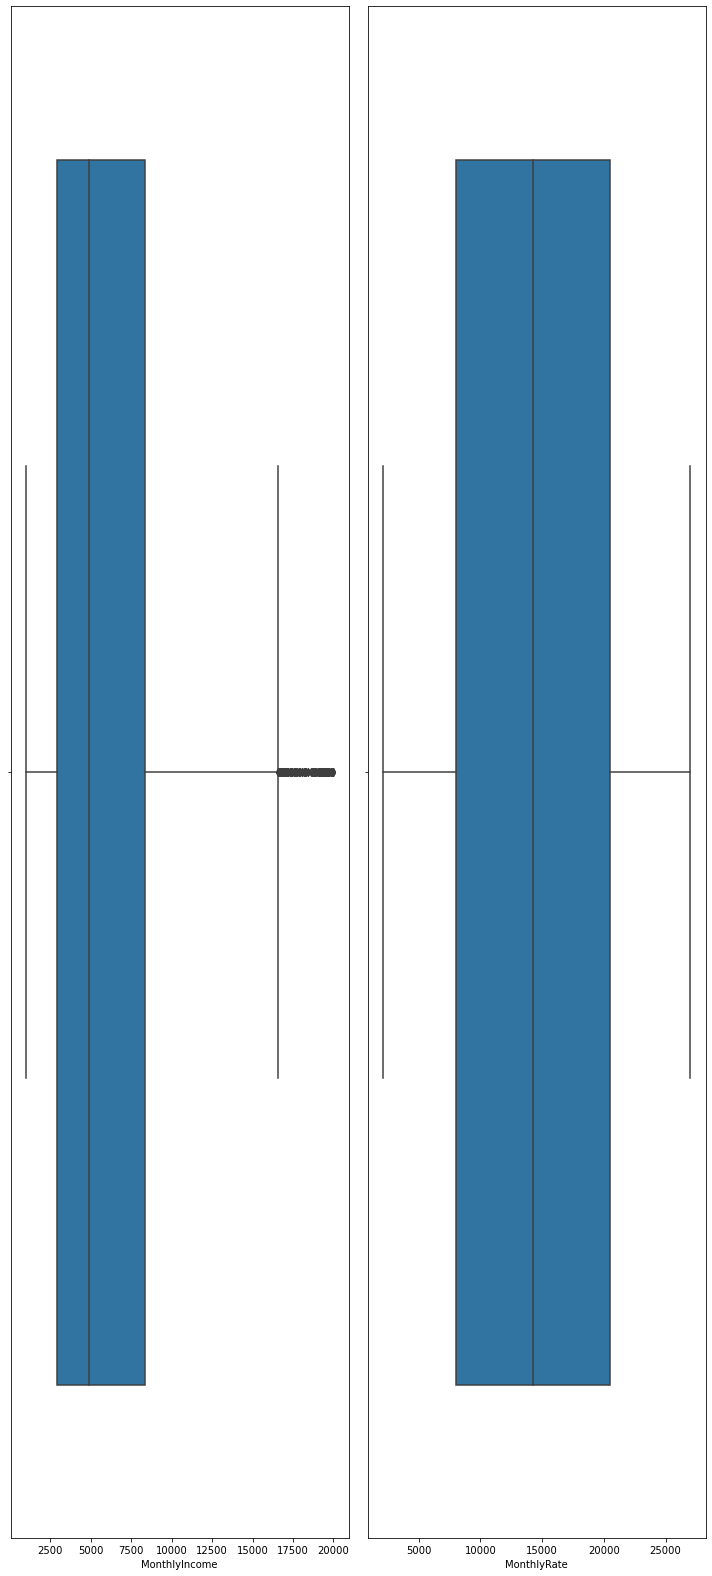

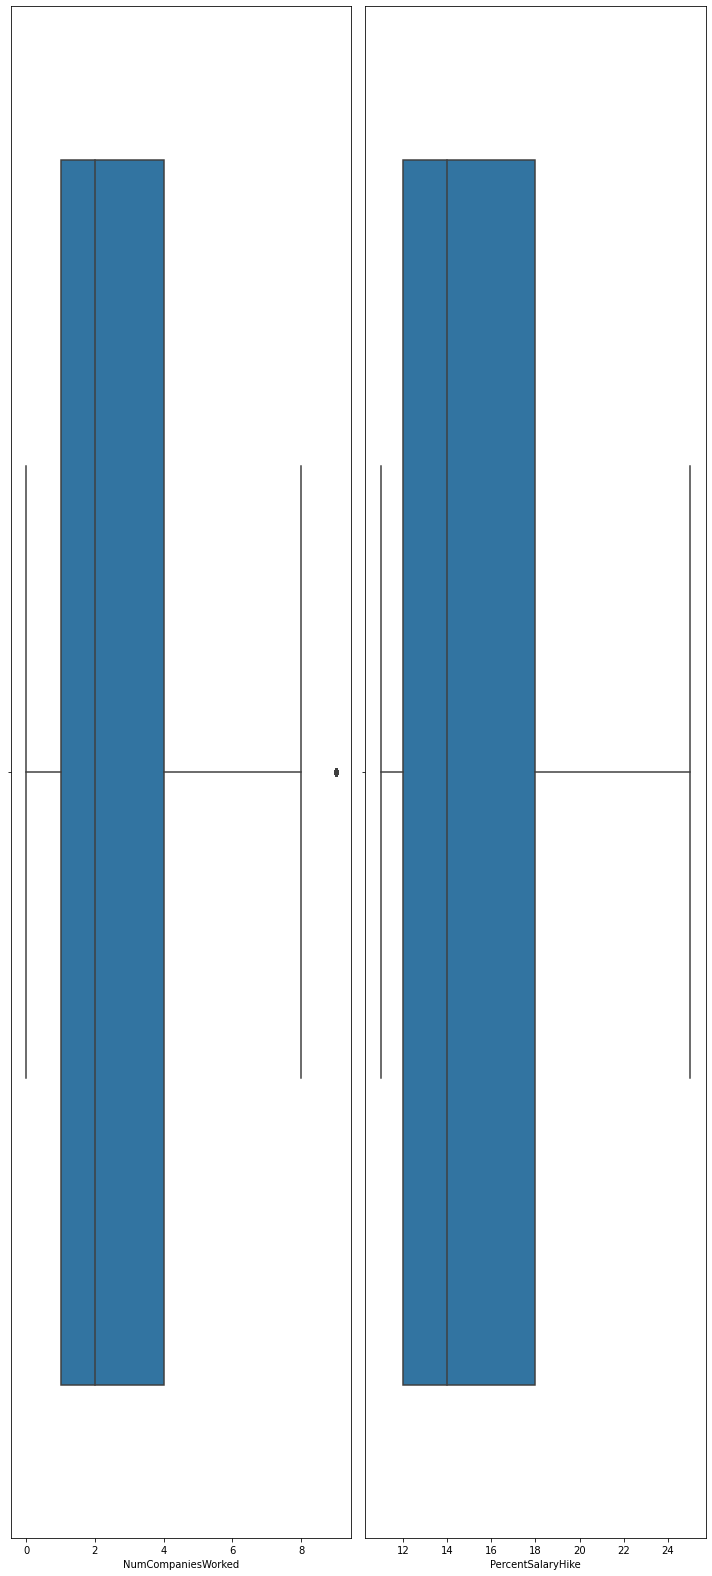

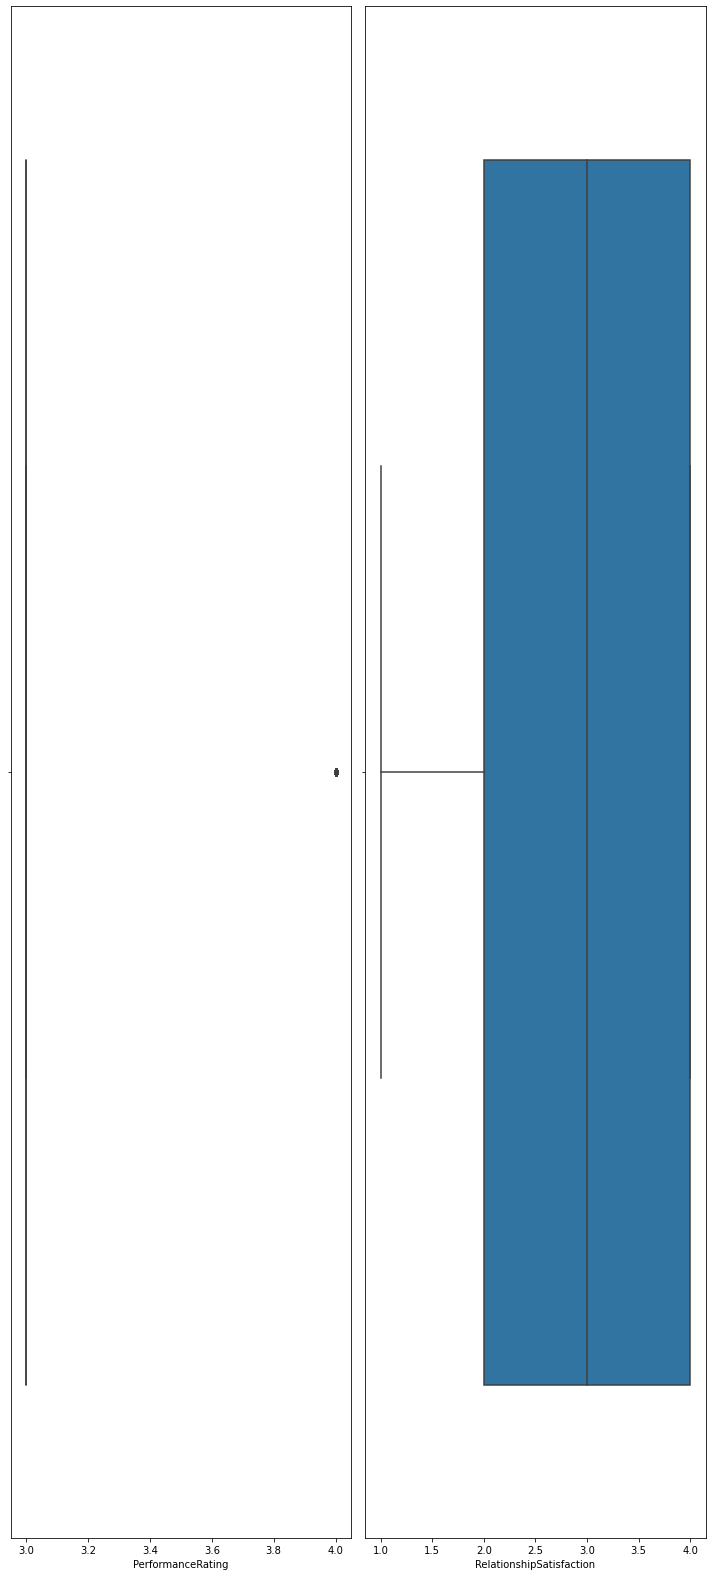

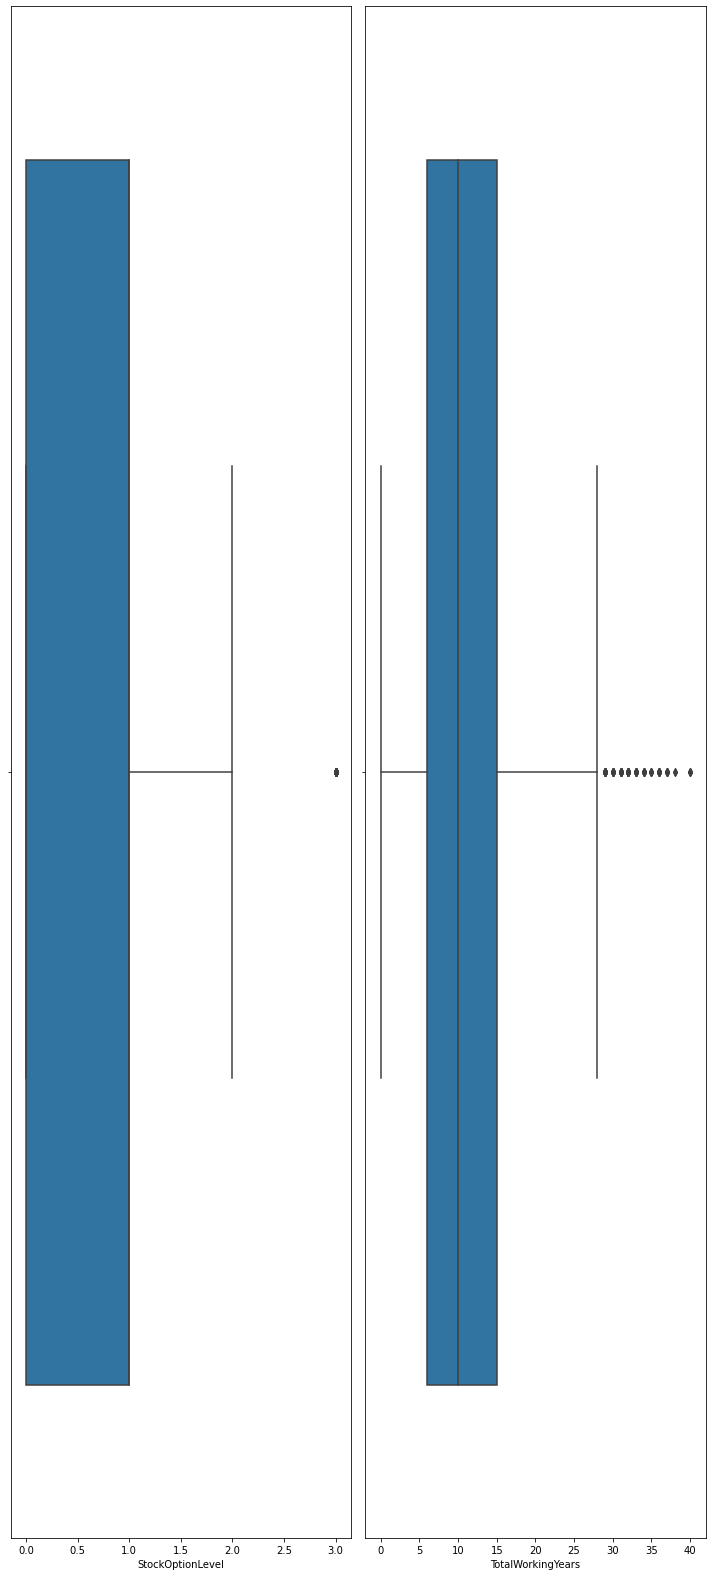

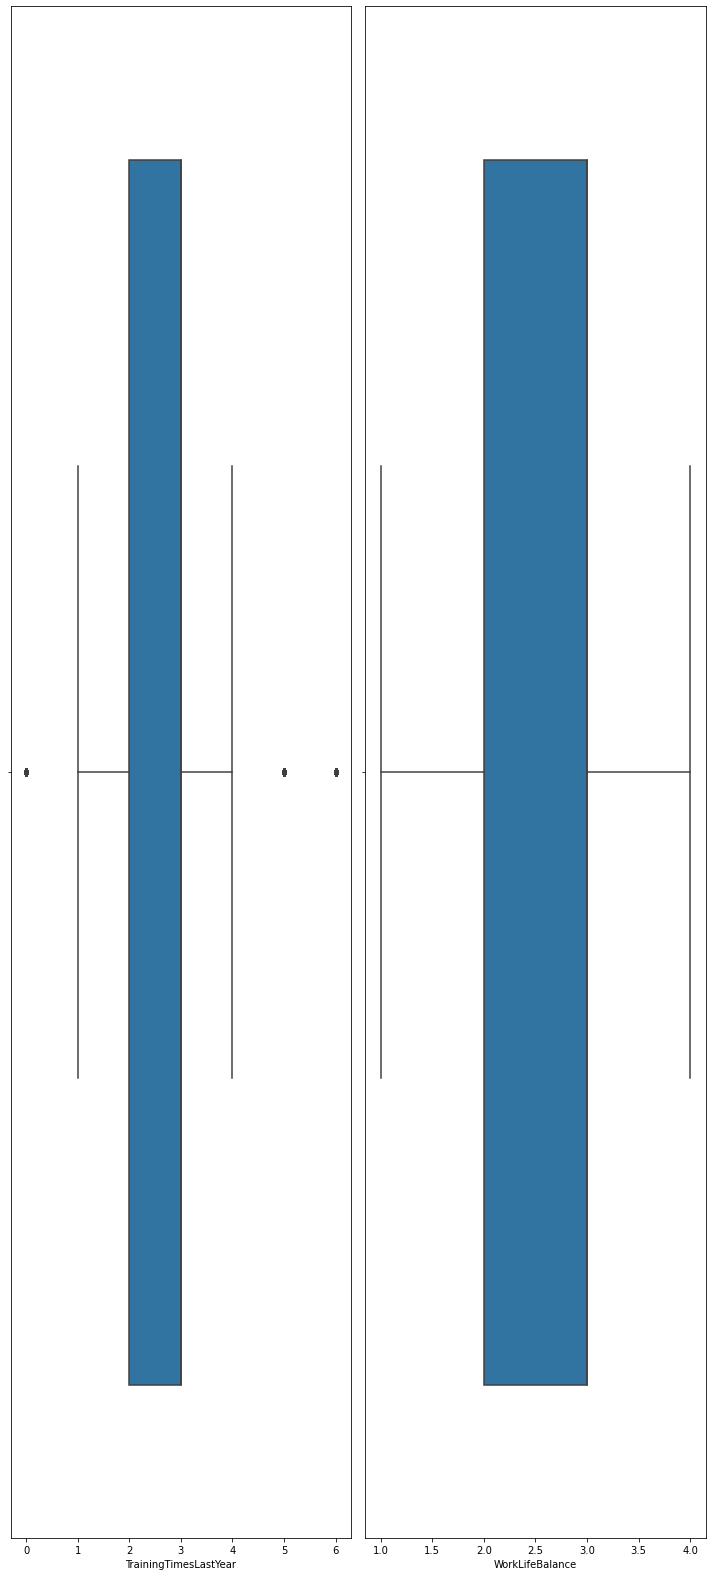

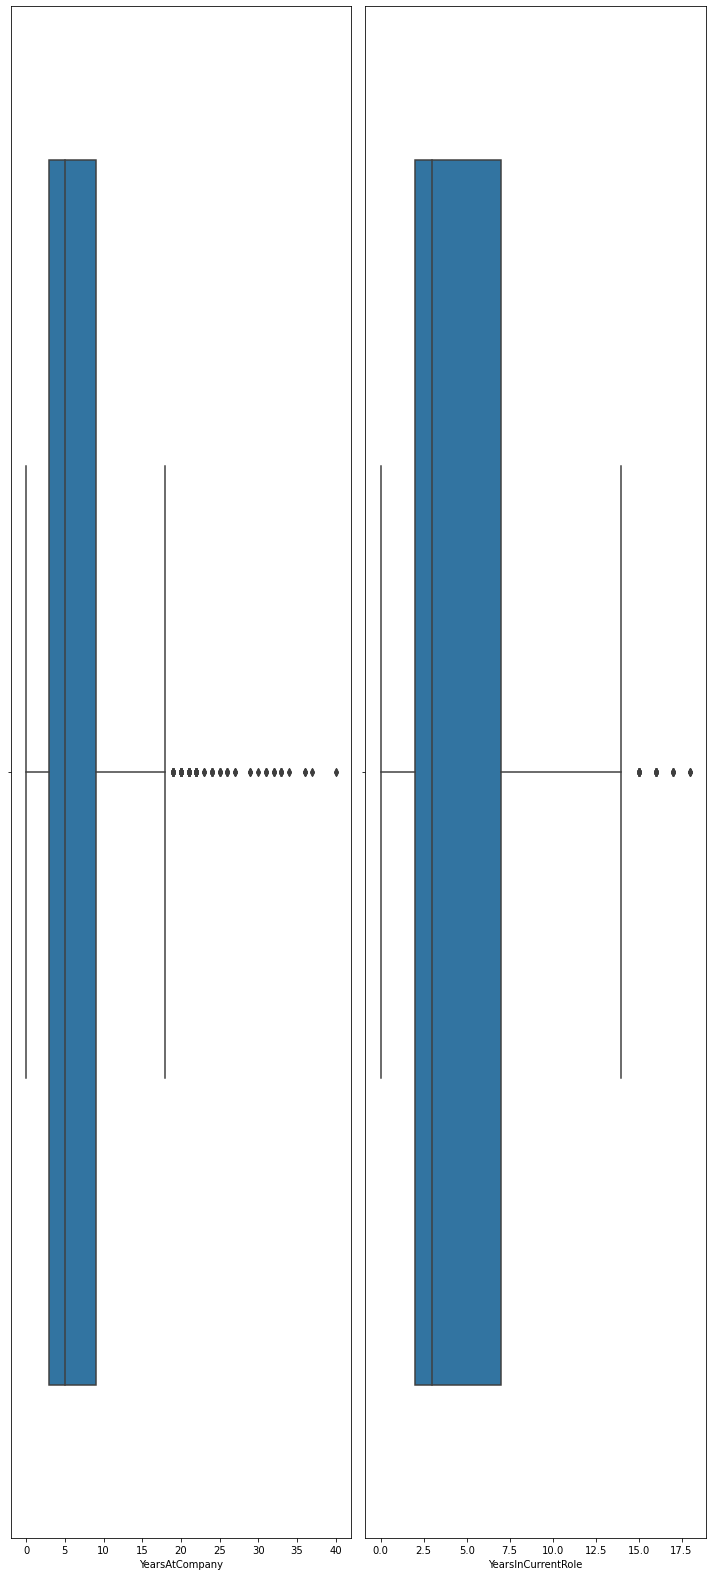

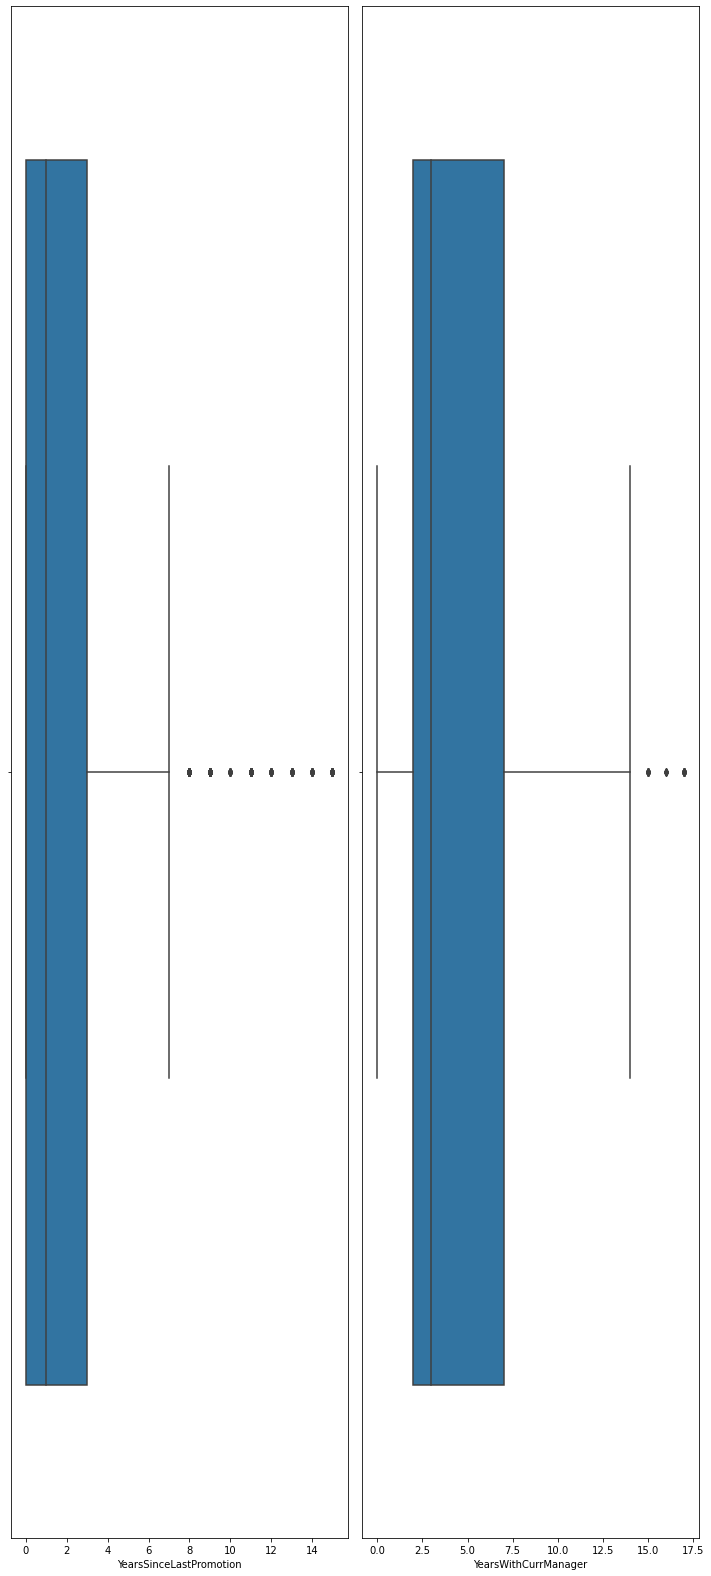

In [19]:
# Checking the outliers

import seaborn as sns
for i in range(0, len(cols), 2):
    if len(cols)>i + 1:
        plt.figure(figsize = (10,22))
        plt.subplot(121)
        sns.boxplot(ds[cols[i]])
        plt.subplot(122)
        sns.boxplot(ds[cols[i + 1]])
        plt.tight_layout()
        plt.show()
    else:
        sns.boxplot(ds[cols[i]])

In [62]:
from scipy.stats.mstats import winsorize  # importing the inbuild winsorize model from scipy library
# Treating outliers
for i in cols:
    if i in ds.select_dtypes(include = np.number).columns:
        ds[i] = winsorize(ds[i],limits = [0.05,0.1],inclusive = (True,True))
        
ds.shape

(2940, 22)

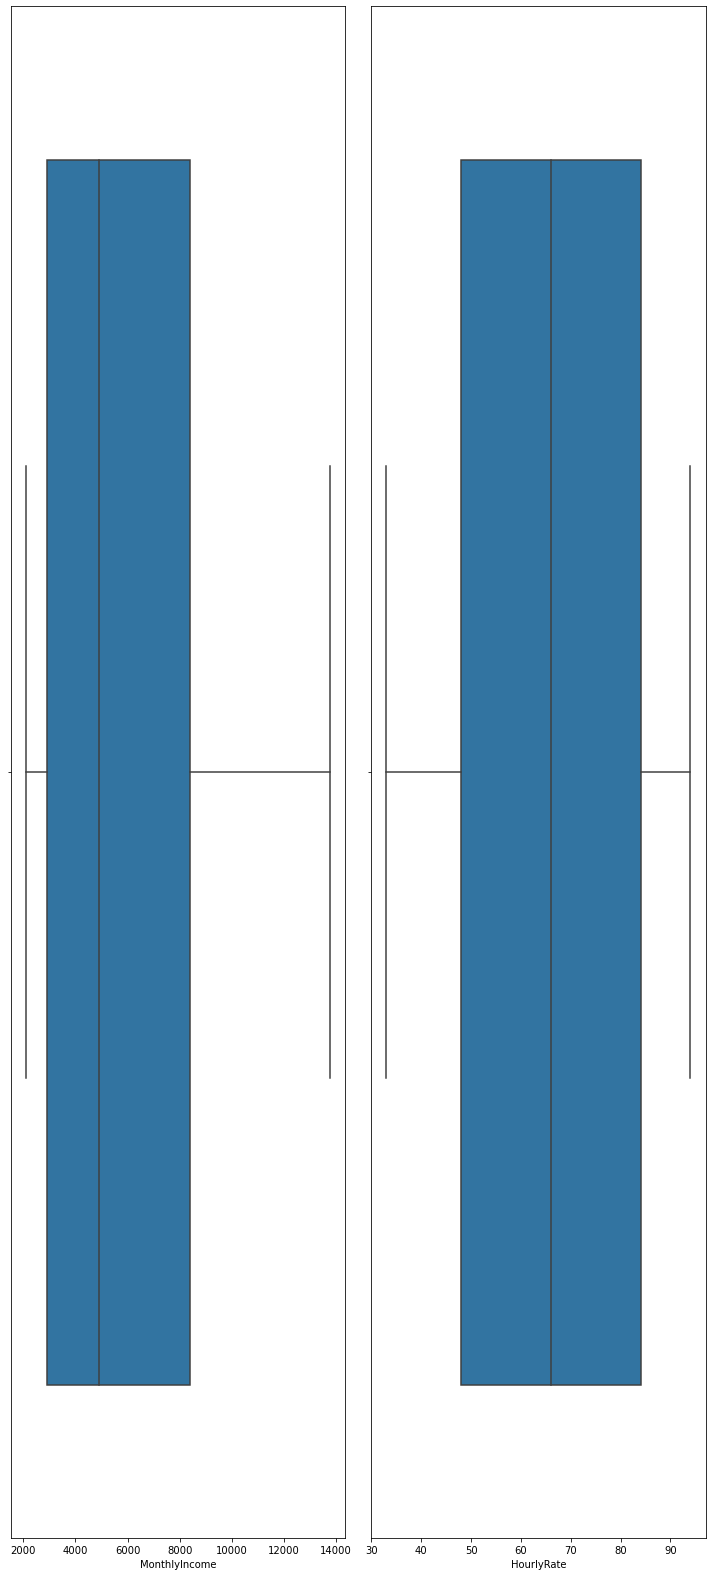

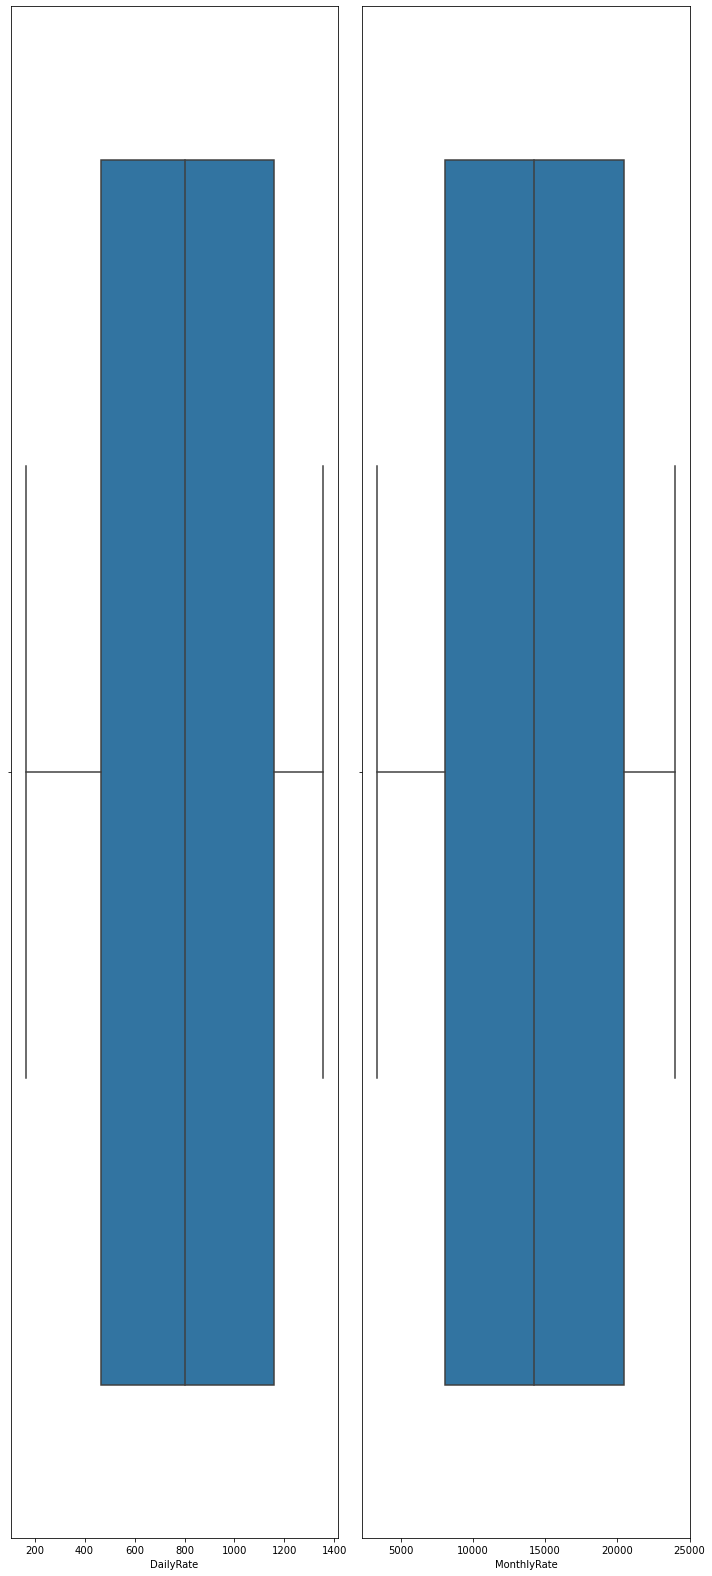

In [63]:
# Checking the outliers

import seaborn as sns
for i in range(0, len(cols), 2):
    if len(cols)>i + 1:
        plt.figure(figsize = (10,22))
        plt.subplot(121)
        sns.boxplot(ds[cols[i]])
        plt.subplot(122)
        sns.boxplot(ds[cols[i + 1]])
        plt.tight_layout()
        plt.show()
    else:
        sns.boxplot(ds[cols[i]])

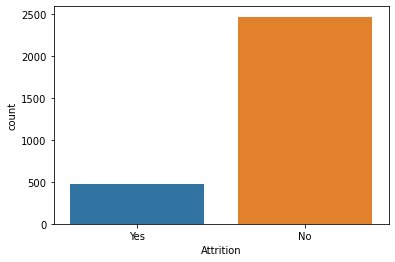

In [20]:
#Visualize this count 

sns.countplot(df['Attrition'])

# We can analyze that the Attrition rate is less in this organization.

In [21]:
# Categorical Features

explore_cols = ['Department', 'BusinessTravel', 'EducationField', 'JobRole', 'Gender', 'MaritalStatus', 'OverTime']

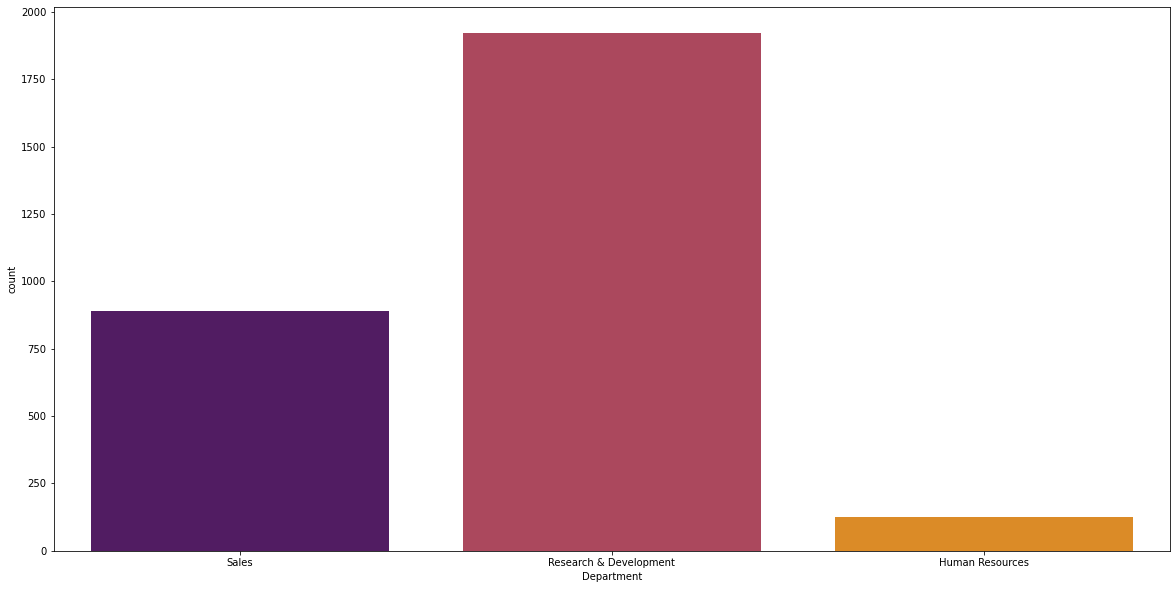

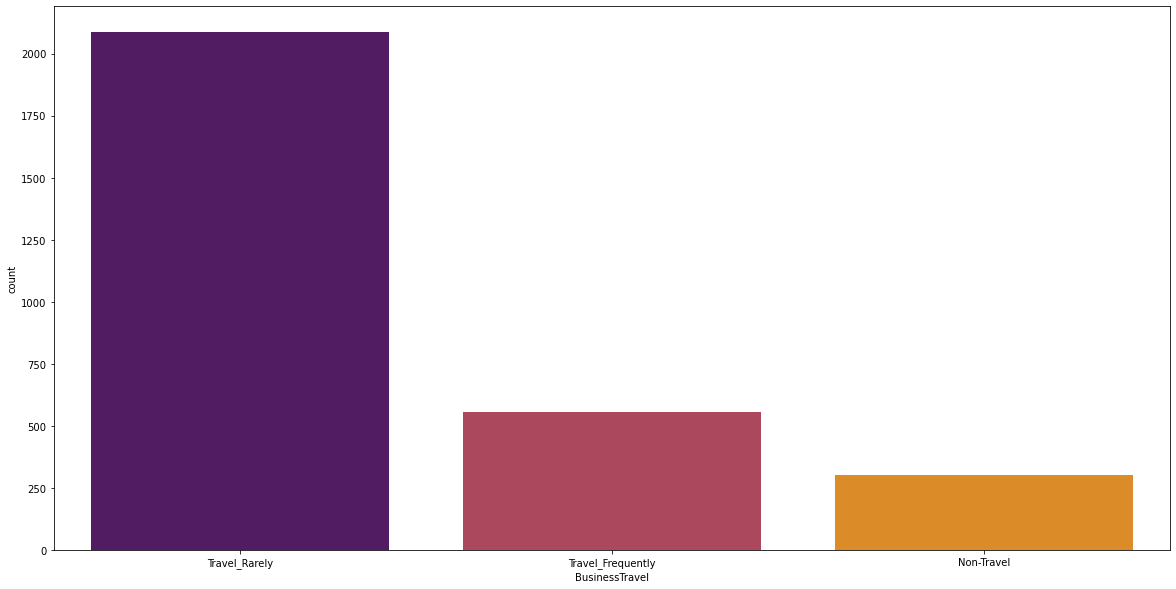

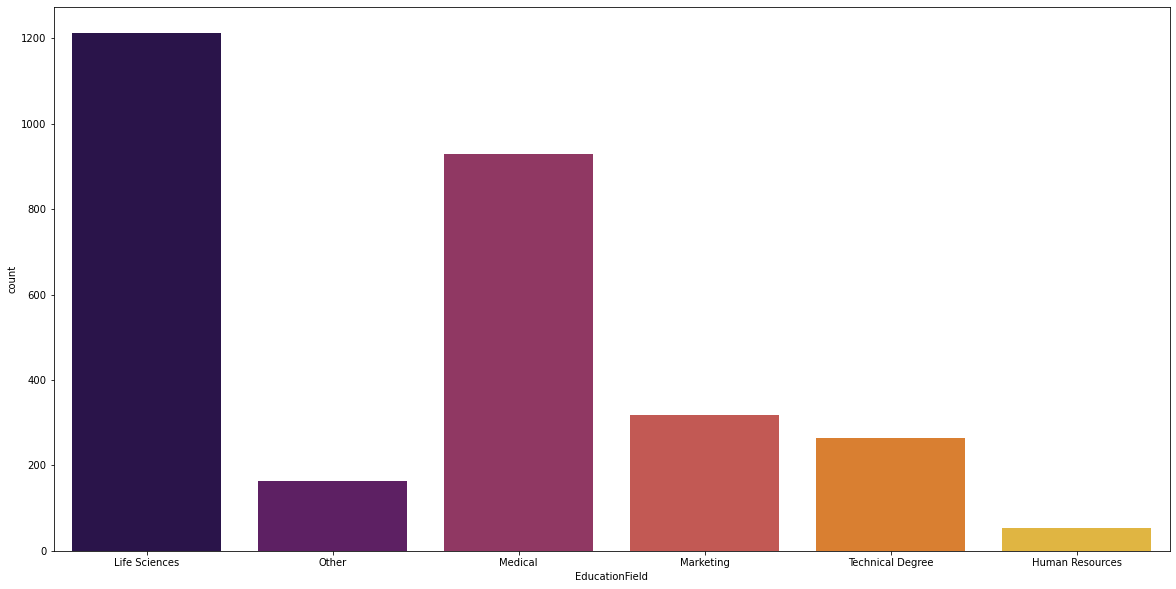

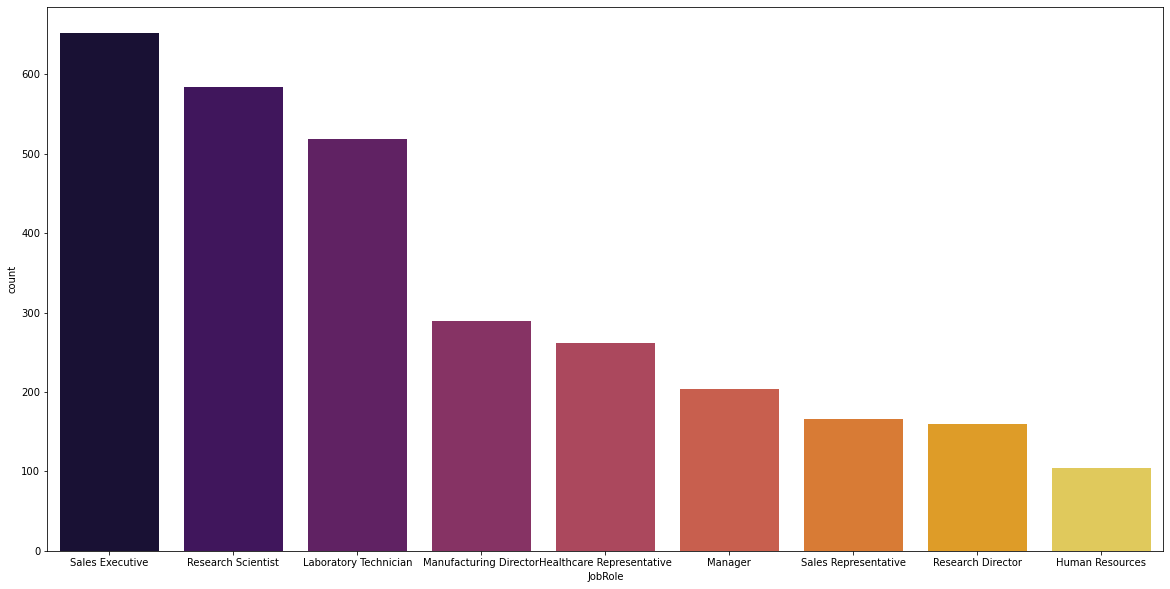

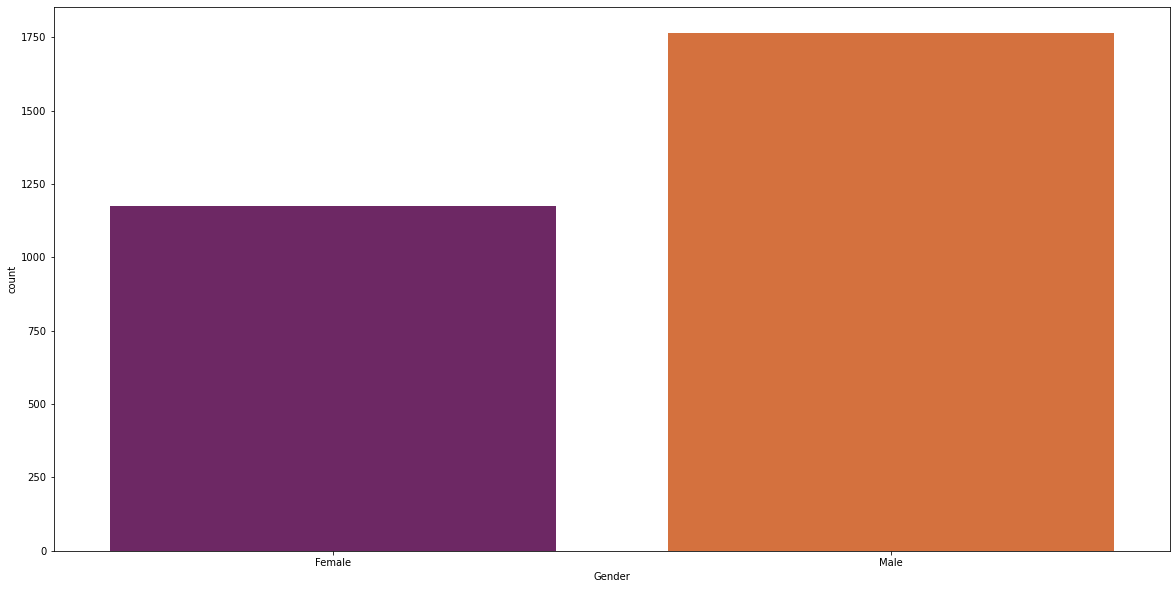

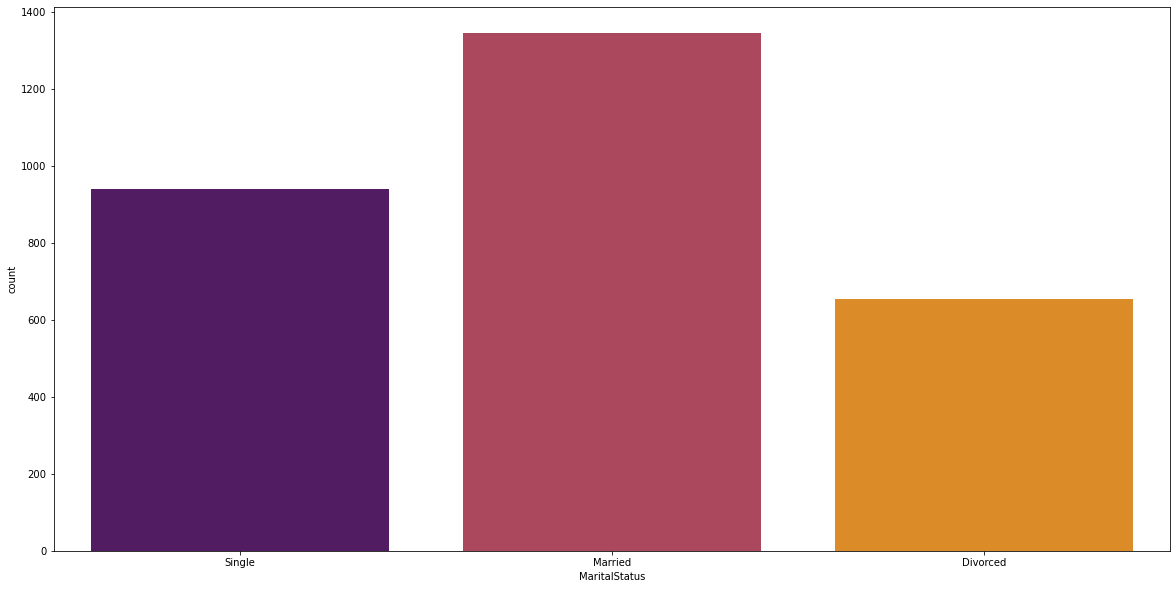

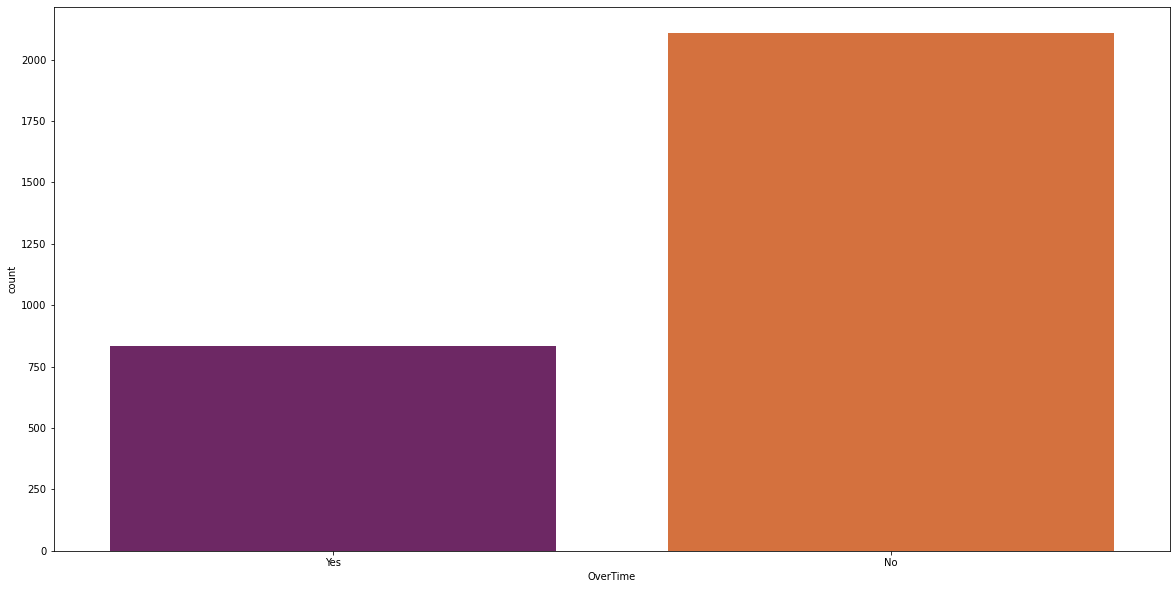

In [22]:
# Analysis of the Categorical Variable

for x in explore_cols:
    plt.figure(figsize = (20,10))
    sns.countplot(df[x],data=df,palette = 'inferno')
    plt.show()

# The count for Research and Development department is more as compared to others and also the count for Human Resources department is the least.
# We can clearly see from the Business travel plot that mostly all the employees travel rarely for business and there are least employees which never go for the Business travel.
# Maximum number of employees working in the organization are from the Life Sciences and Medical background education field. Least number of employees are from the HR background in this organization.
# The maximum number of employees are working on mainly three job roles i.e. Sales Executive, Research Scientist and Laboratory Technician. The minimum number of employees nearly around 100 are working into HR profile.
# There are more number of male employees working in this organization as compared to the females.
# Almost more than 1300 employees working here are married and 900 to 1000 employees are having their marital status as single and around 600 employees are having marital status as divorced.
# Only 750 to 1000 of employees are giving their extra time to the organization.

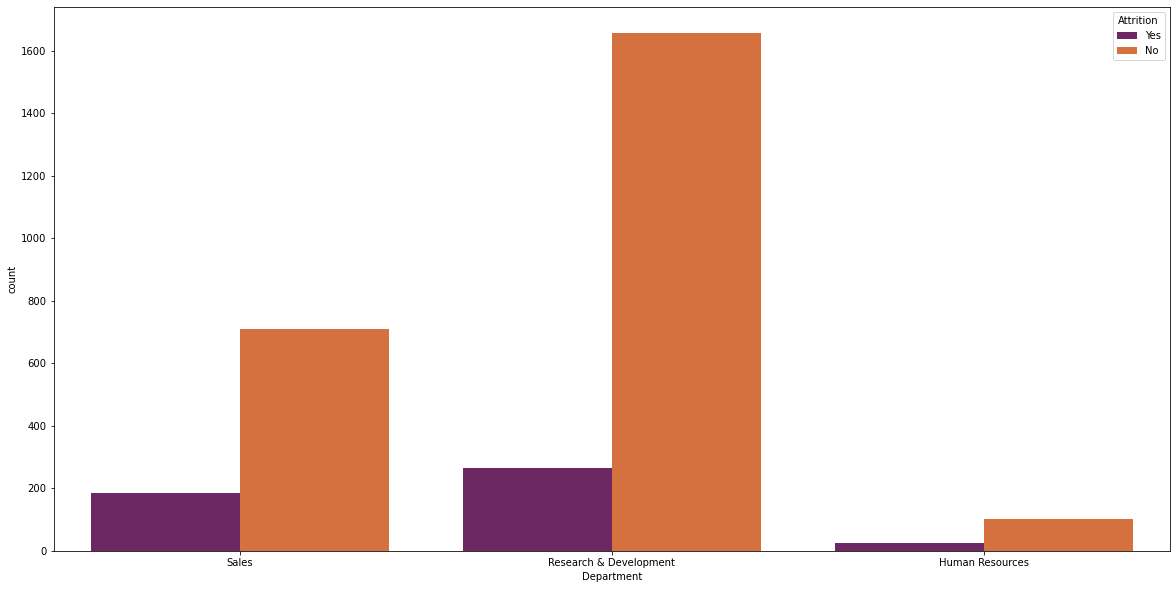

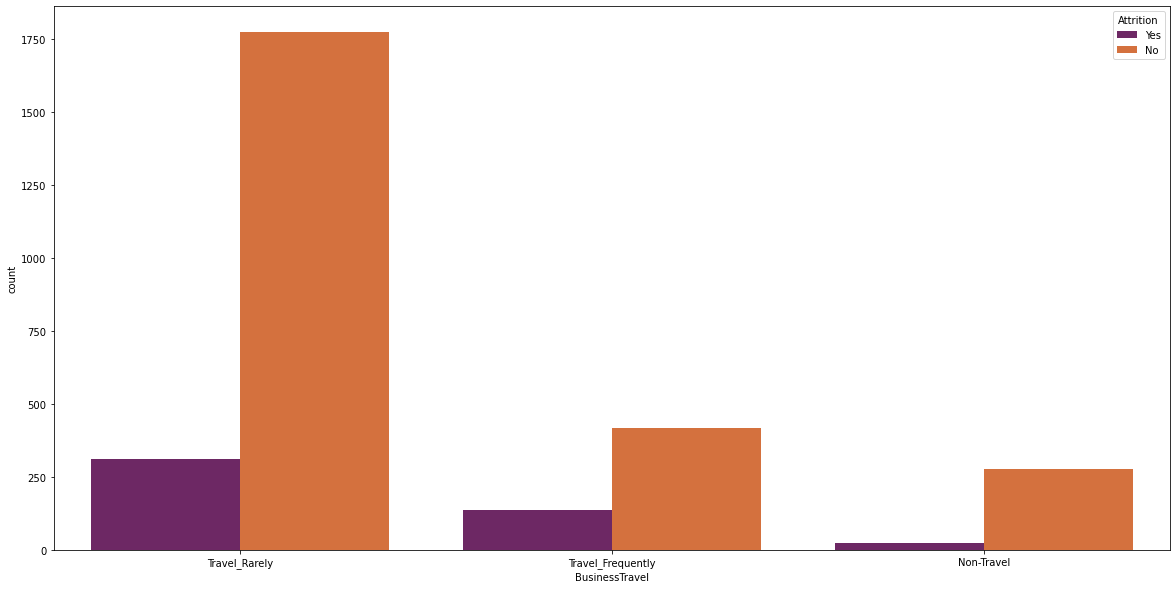

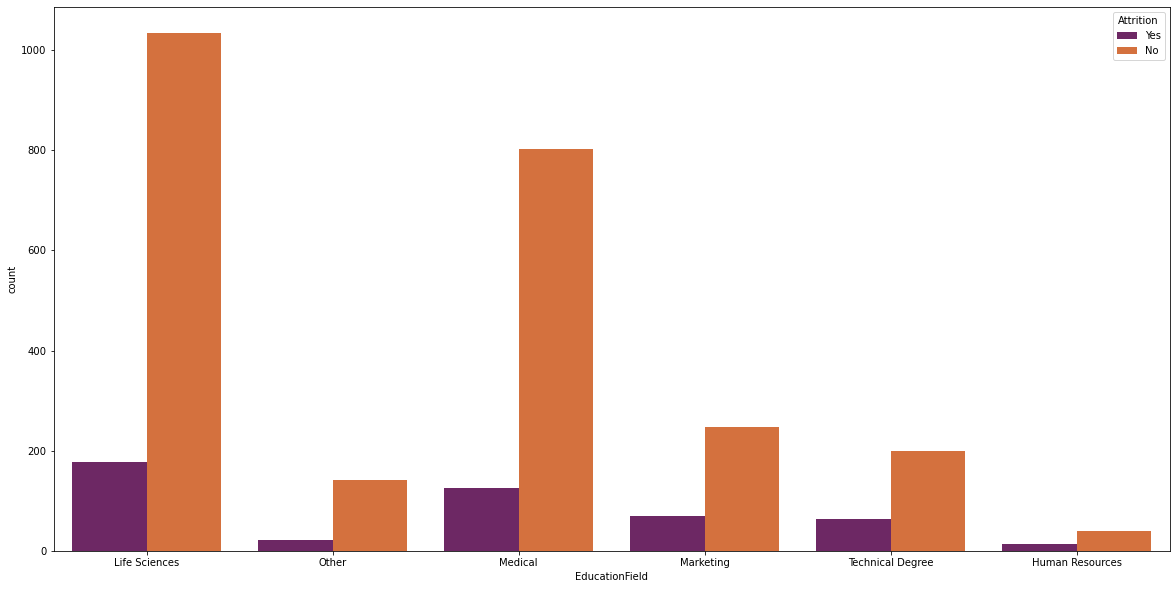

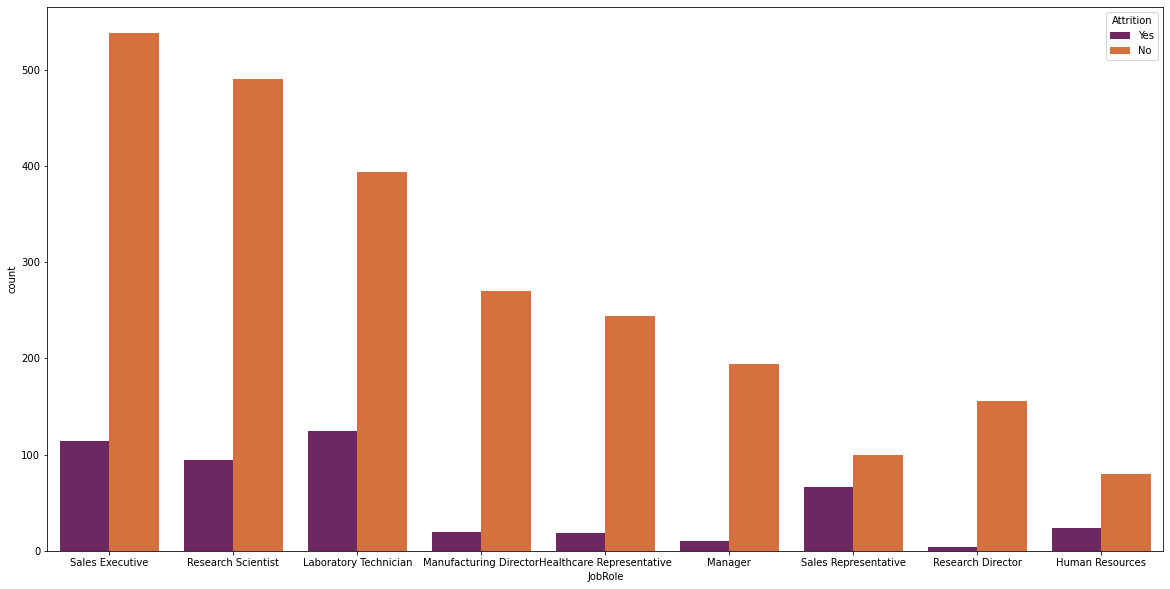

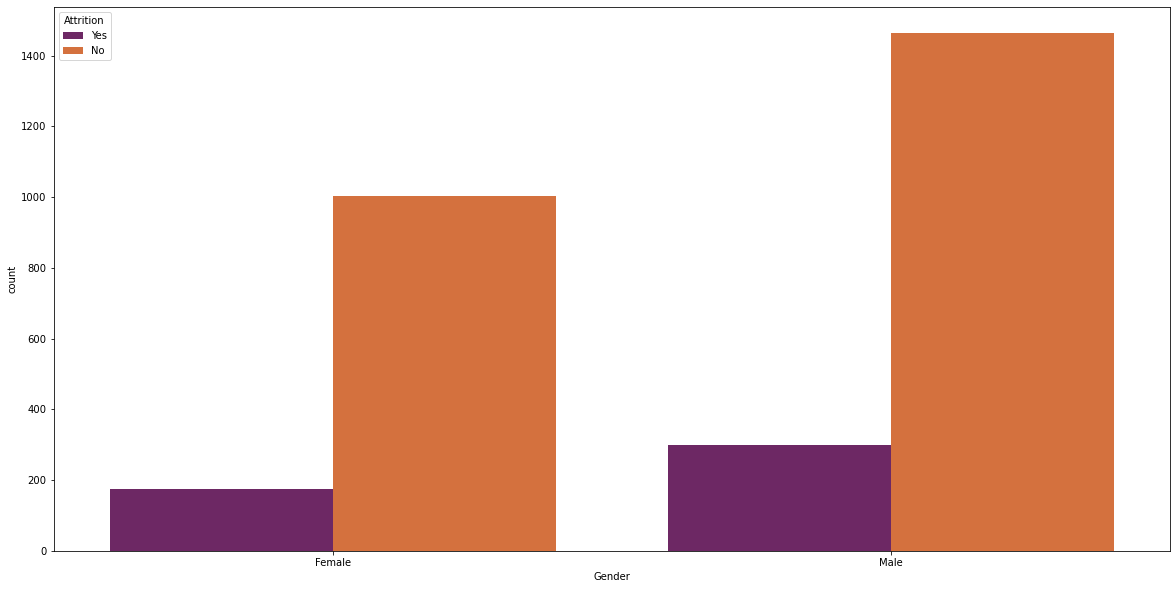

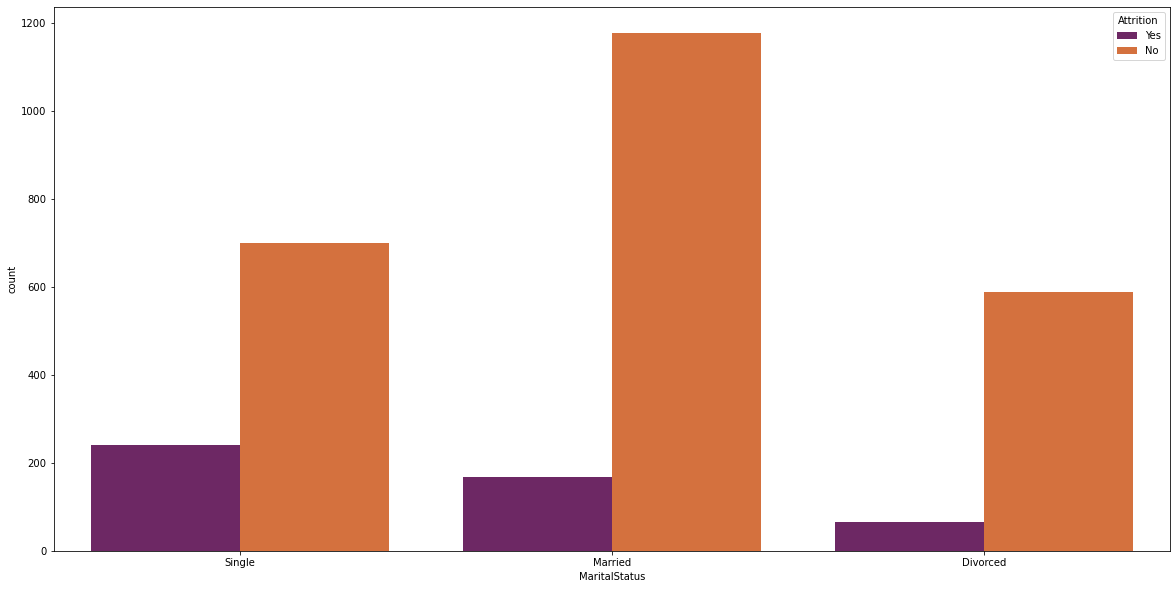

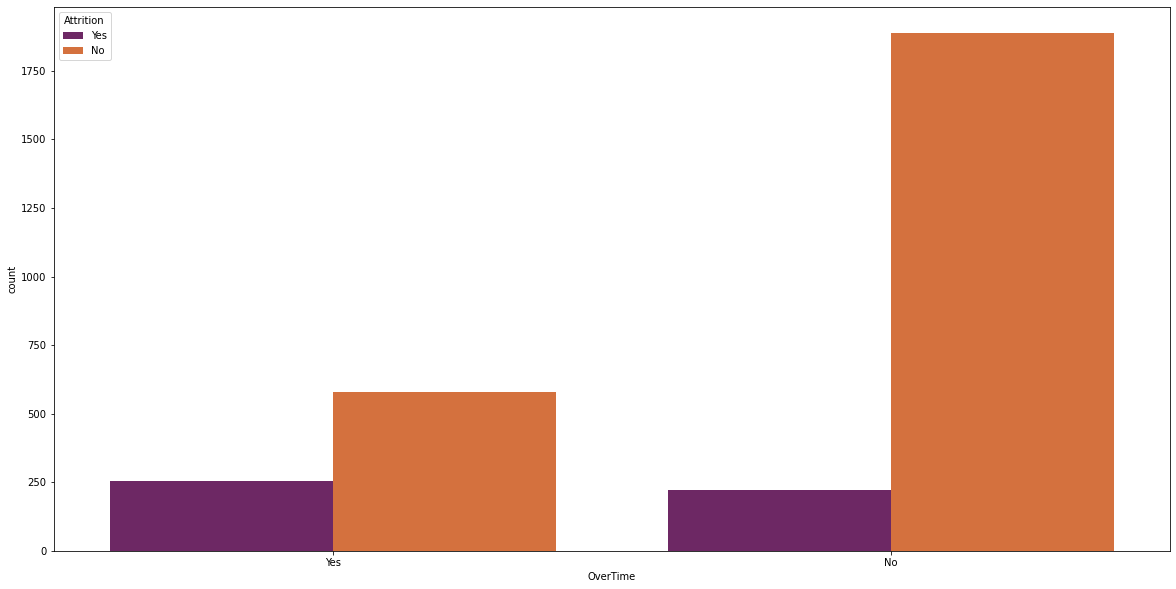

In [23]:
# Analysing the Attrition with Categorical Features

for x in explore_cols:
    plt.figure(figsize = (20,10))
    sns.countplot(df[x],hue = 'Attrition',data=df,palette = 'inferno')
    plt.show()

# Attrition is more in Research and Development Department though there are more number of employees in the R & D Department and least attrition rate in the Human Resources department. Research and Development department needs more focus.
# The employees those who travel rarely are leaving the company as compared to travel frequently and non-travel are the least.
# Attrition is more in the Life Sciences and medical department so we need to do more to stop the employees as the ratio of employees working in Life Sciences and Medical EducationField are very high.
# High number of employees are working as a SalesExecutive, Research Scientist and Laboratory Technician and but focus is needed incase of Laboratory Technician and Sales Executive profile as they are facing the attrition problem.
# On the basis of Gender, we can see that more number of employees working in this company are male and their rate of leaving the company is little high as compared to the Female employees so we need to discuss the reasons for leaving.
# There are huge number of married employees working in this organization but the attrition rate is high incase of employees those whose maritalstatus is single.
# There are least number of employees those who are giving extra time to the organization.

In [24]:
cols = ['MonthlyIncome', 'HourlyRate', 'DailyRate', 'MonthlyRate']

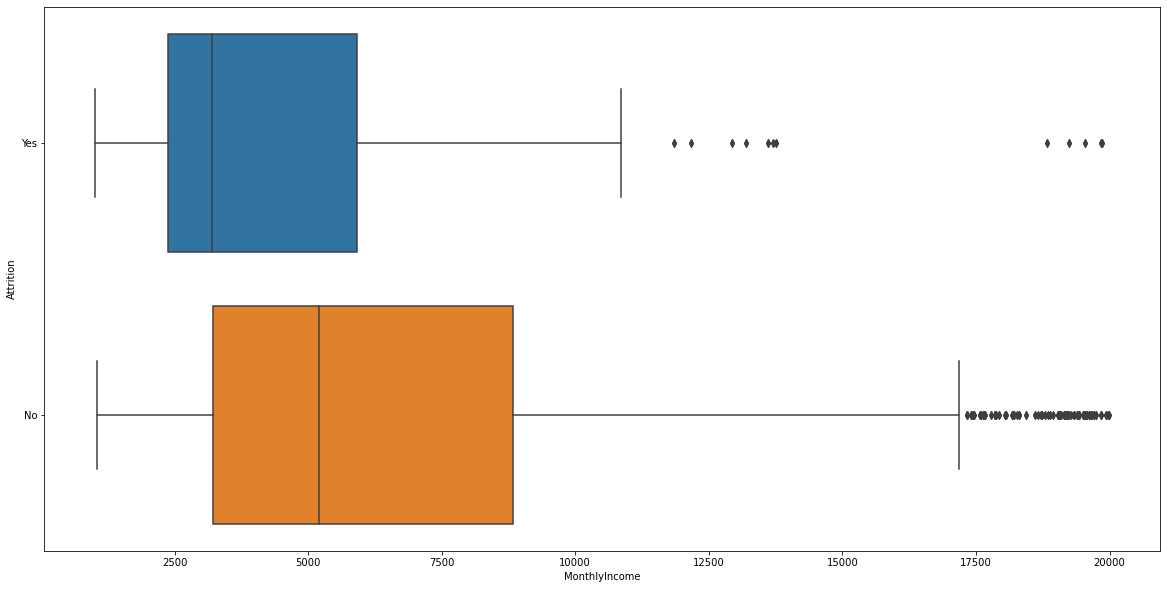

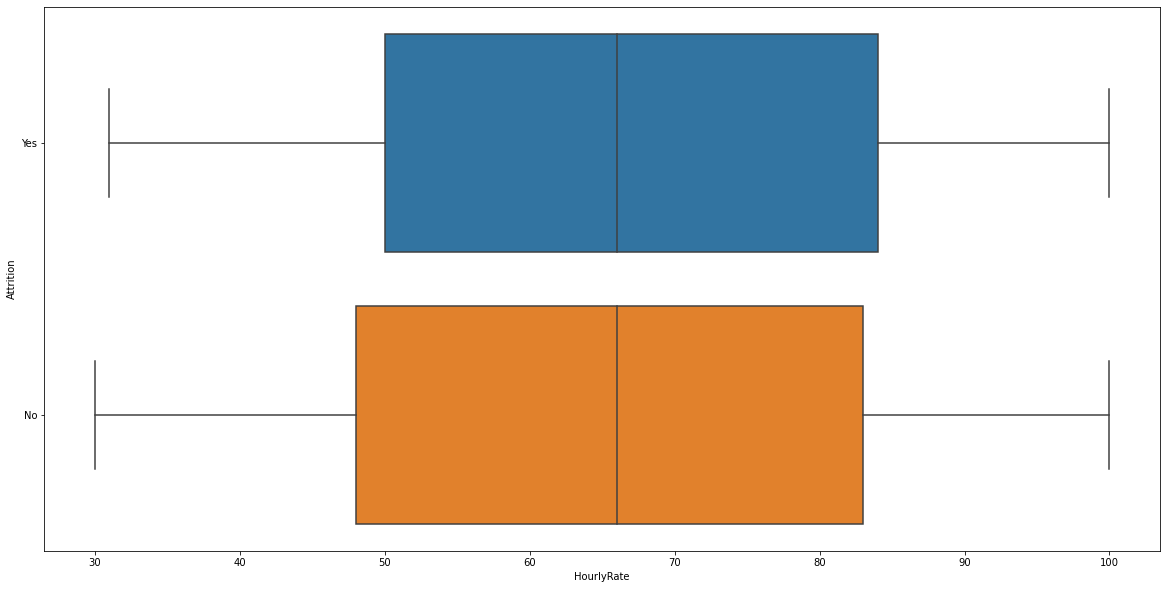

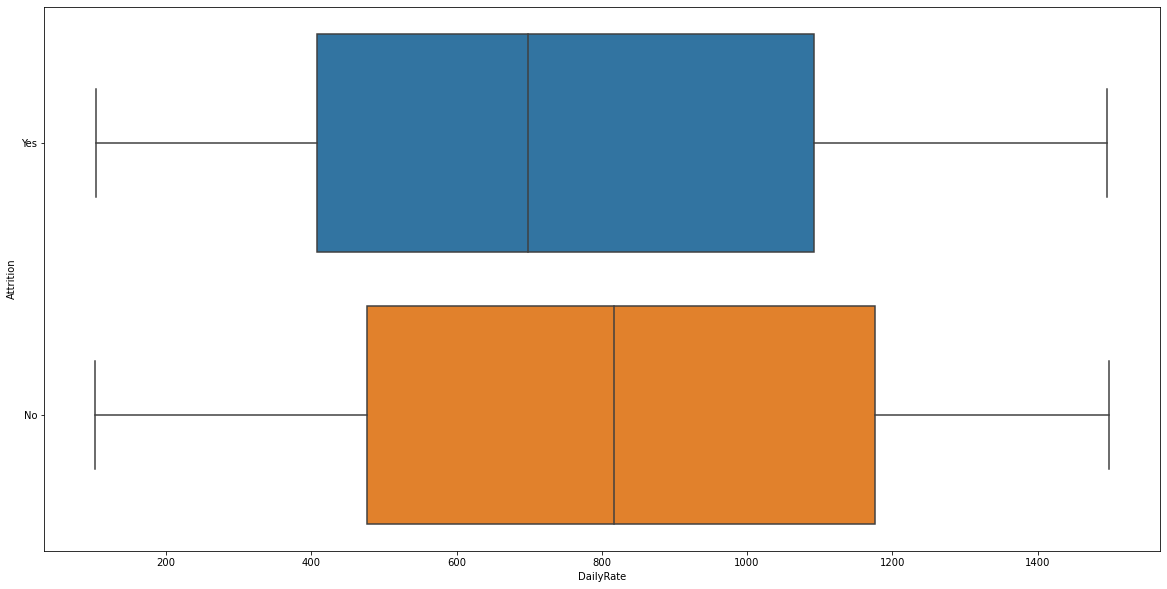

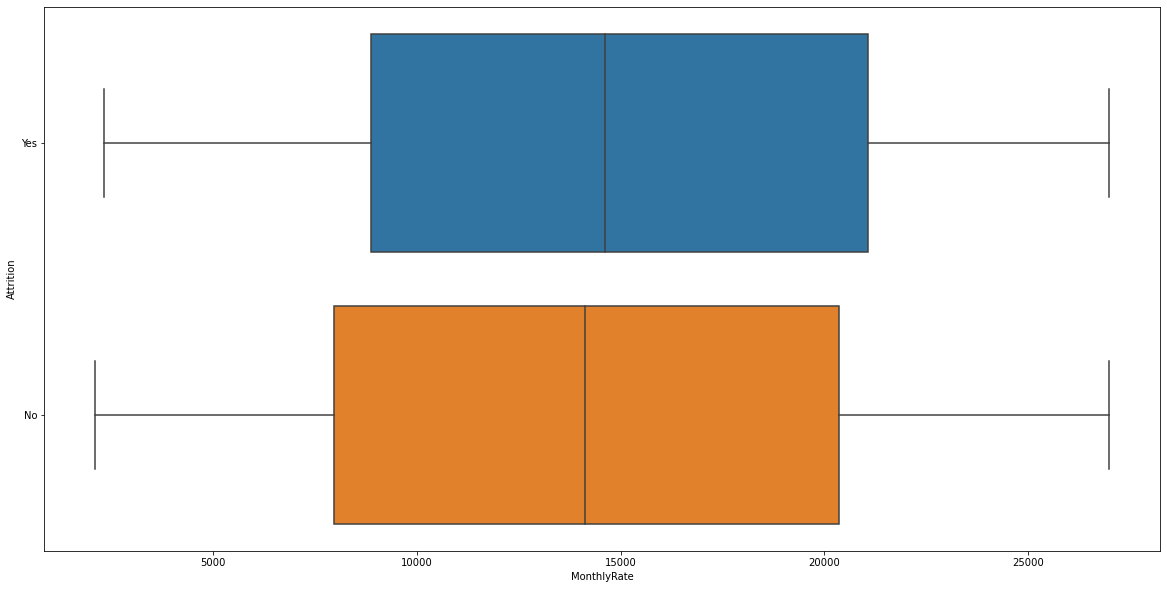

In [25]:
for x in cols:
    plt.figure(figsize = (20,10))
    sns.boxplot(df[x],data=df, y = 'Attrition')
    plt.show()

# The employees who have attrition are having lower monthly income and lower daily rate and on the other hand they have more number of Hourly rate and monthly rate.

In [26]:
# Numerical features

ex_cols = ['Age','DistanceFromHome','EnvironmentSatisfaction','JobInvolvement',
           'JobSatisfaction','NumCompaniesWorked','PercentSalaryHike','PerformanceRating',
           'RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',
           'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

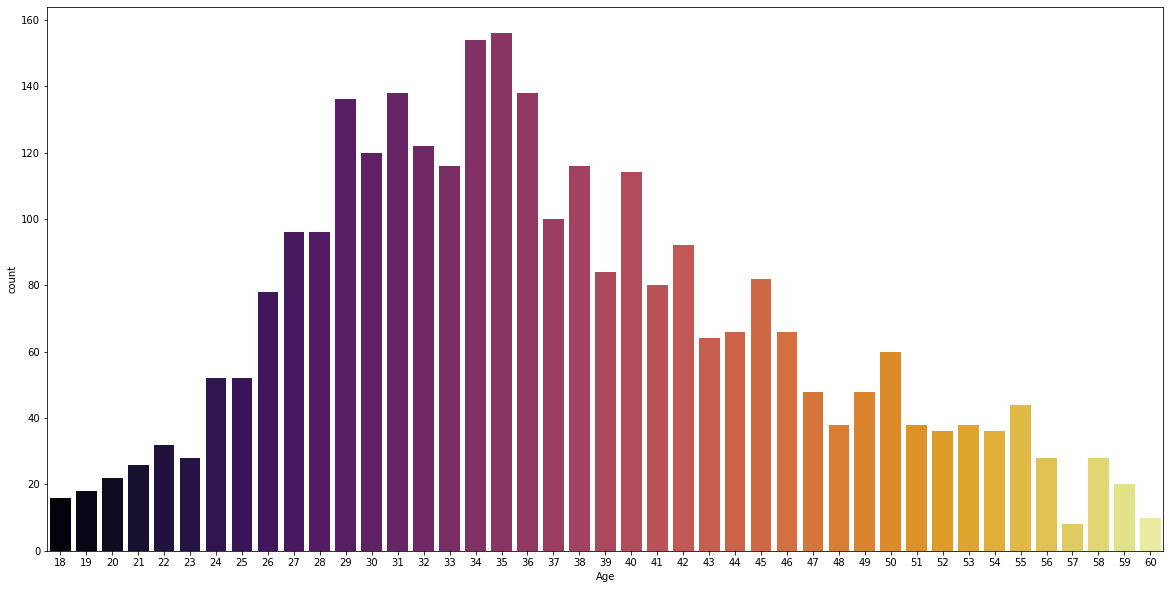

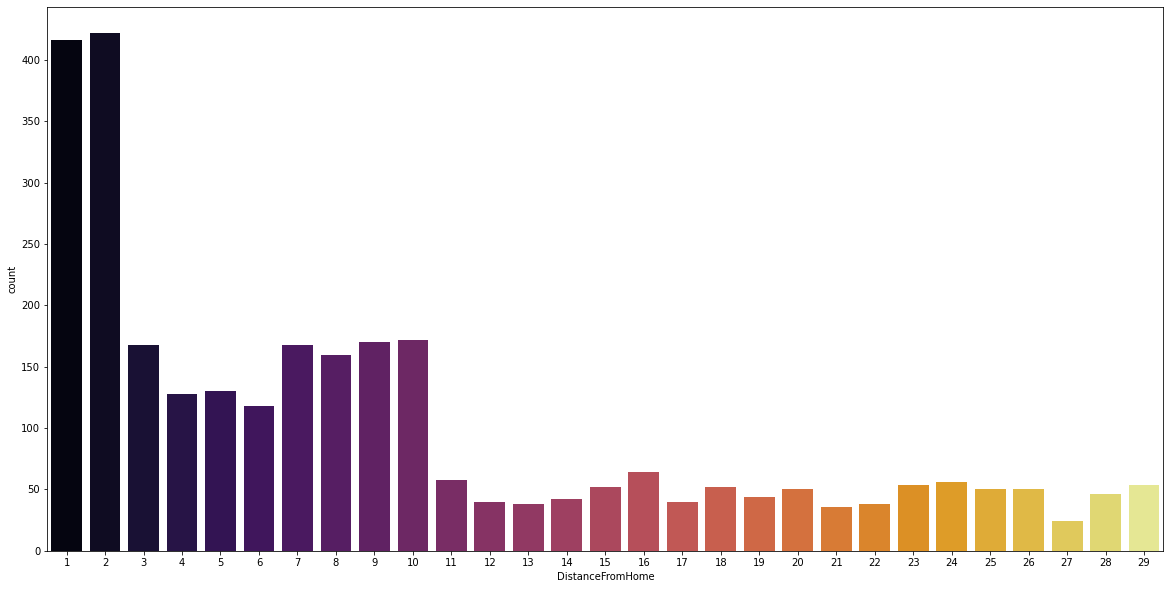

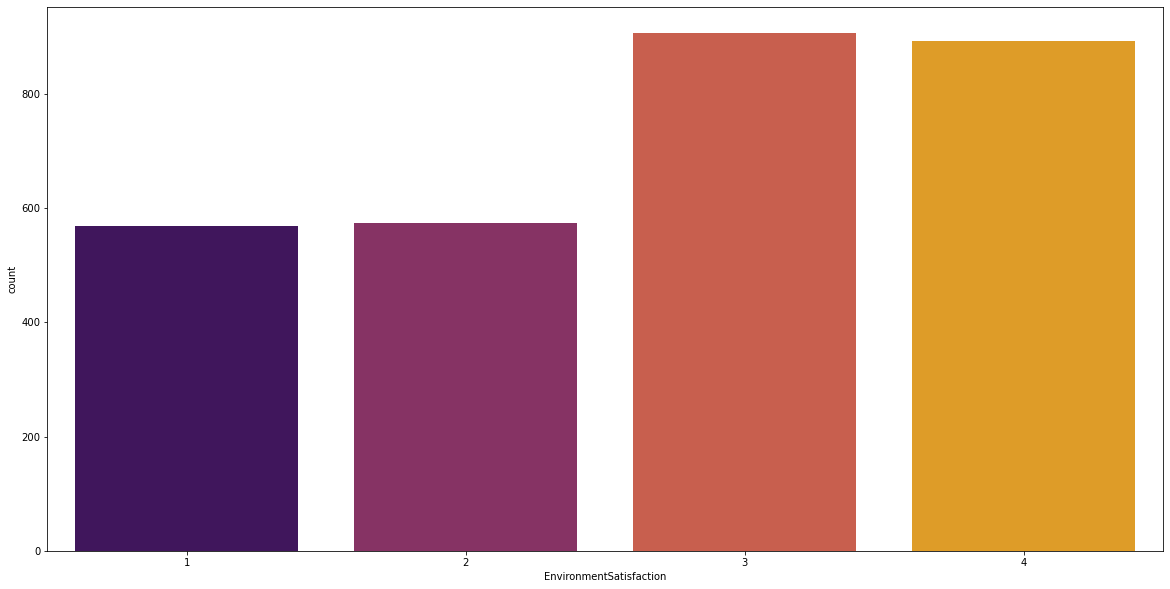

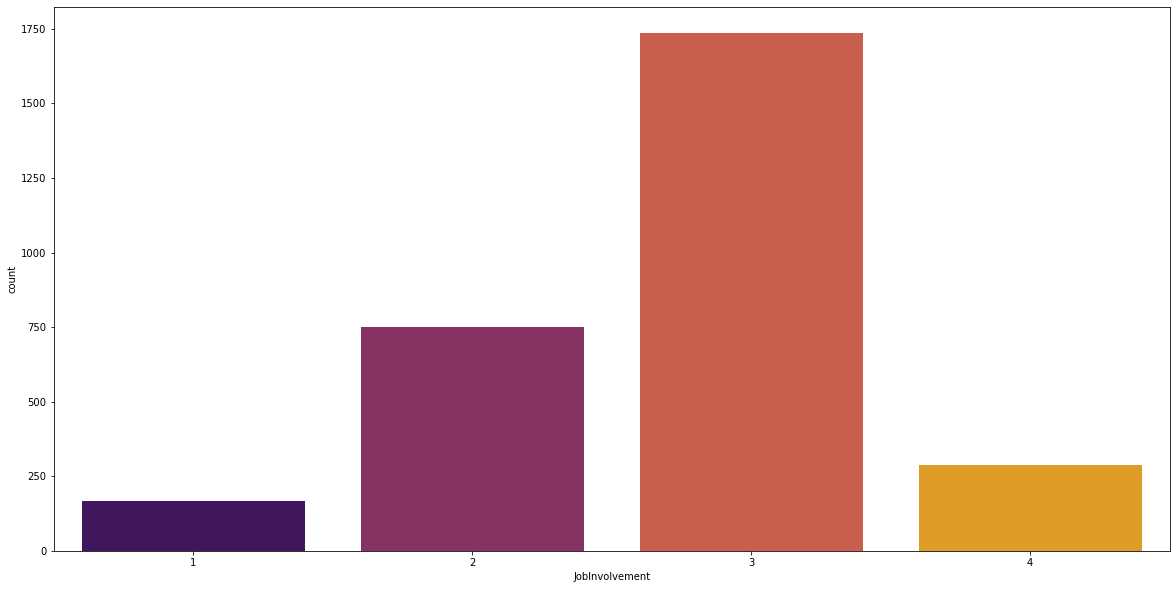

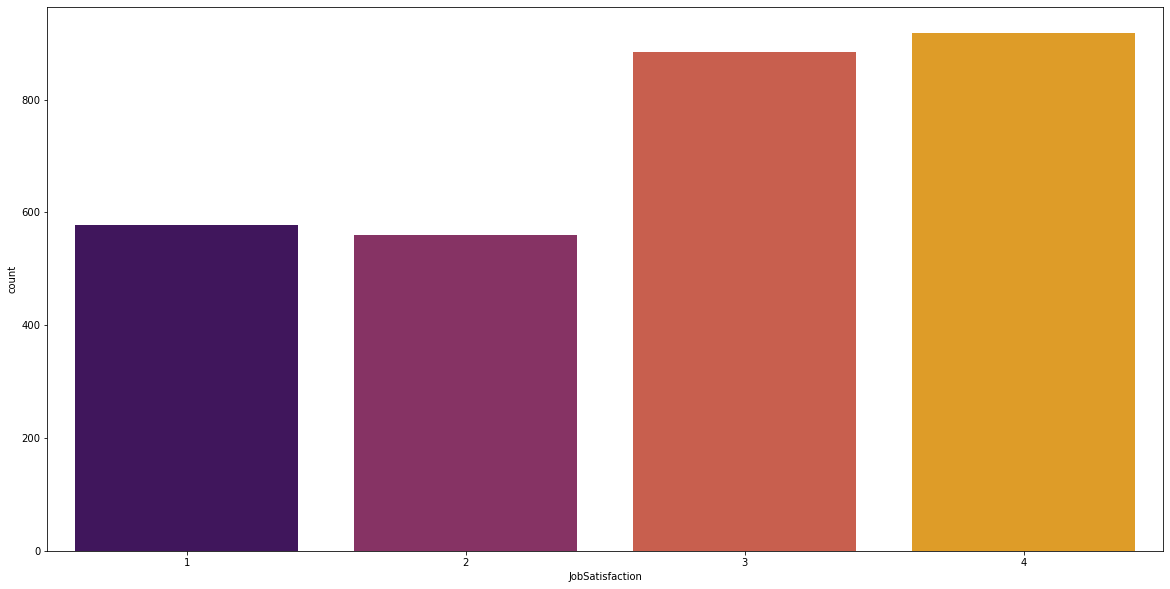

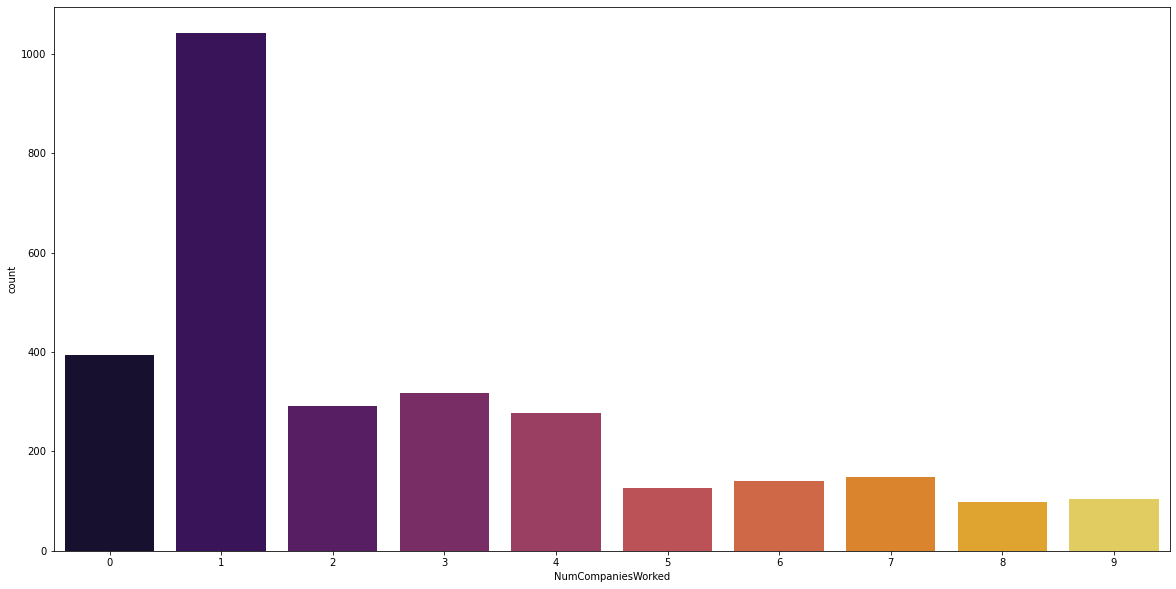

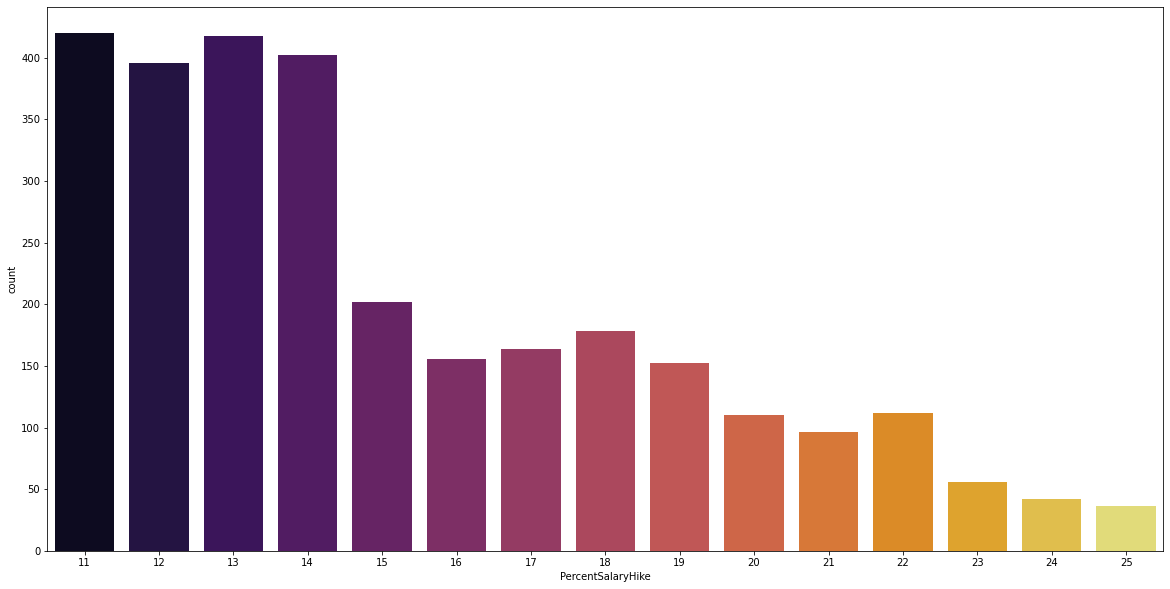

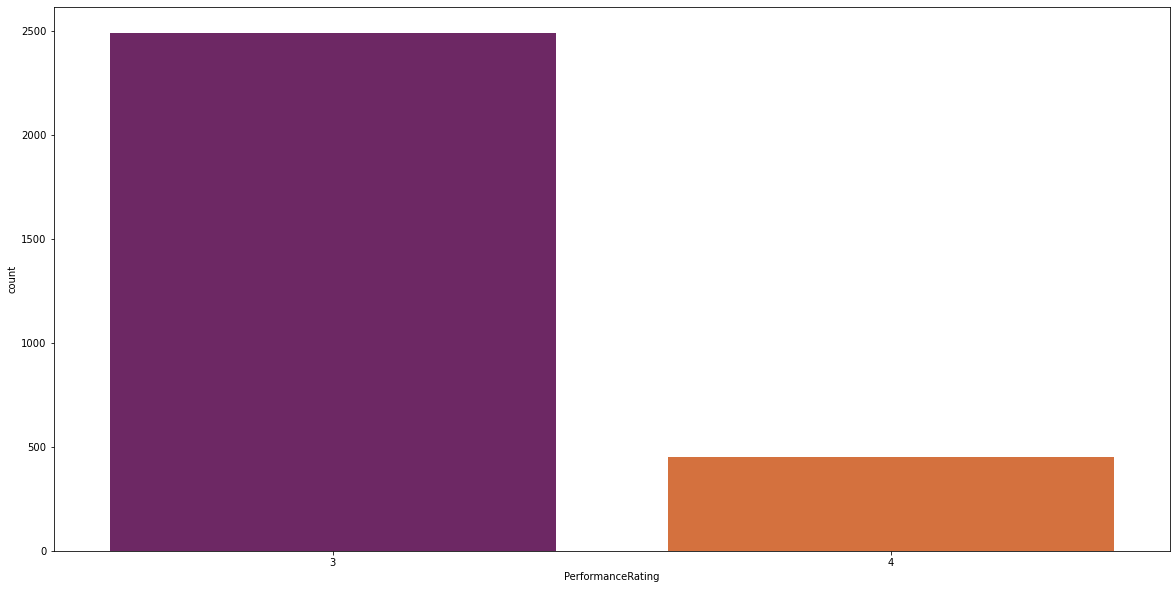

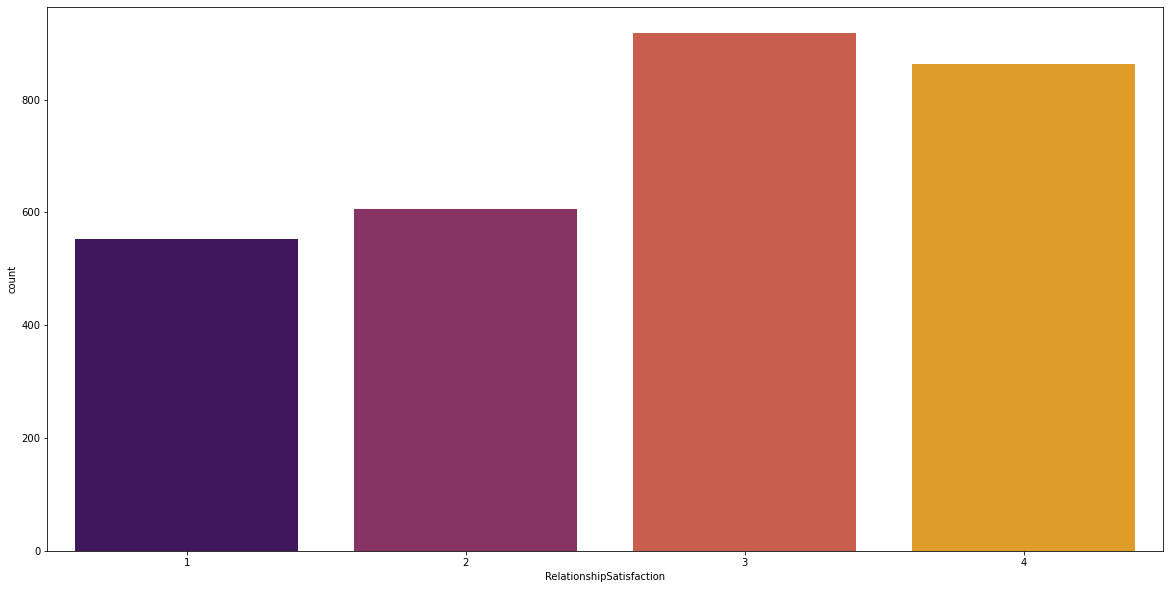

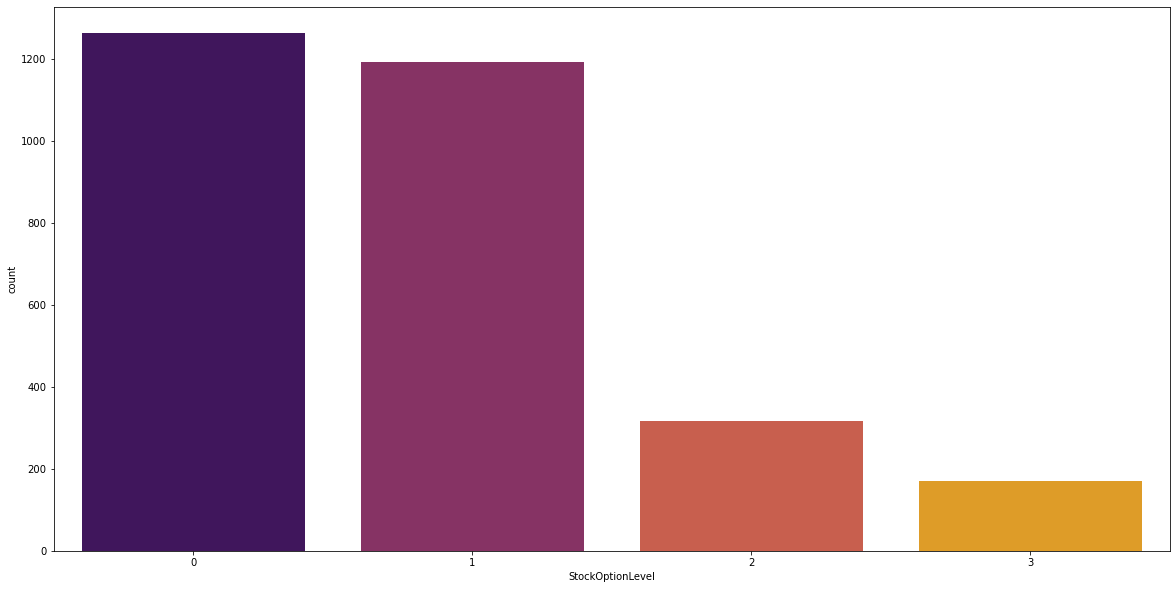

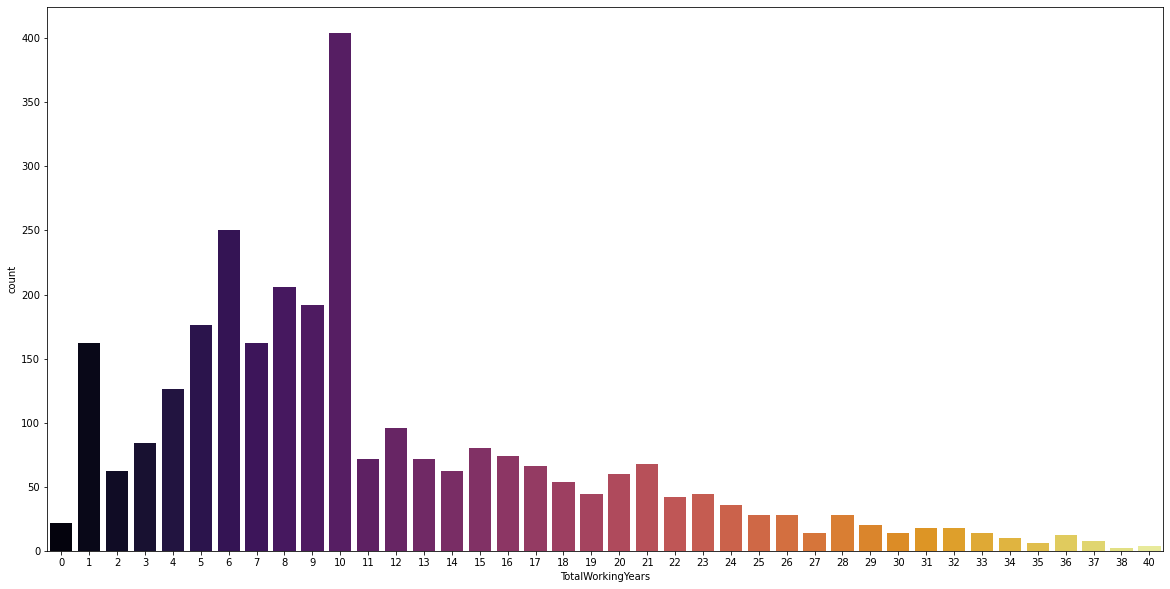

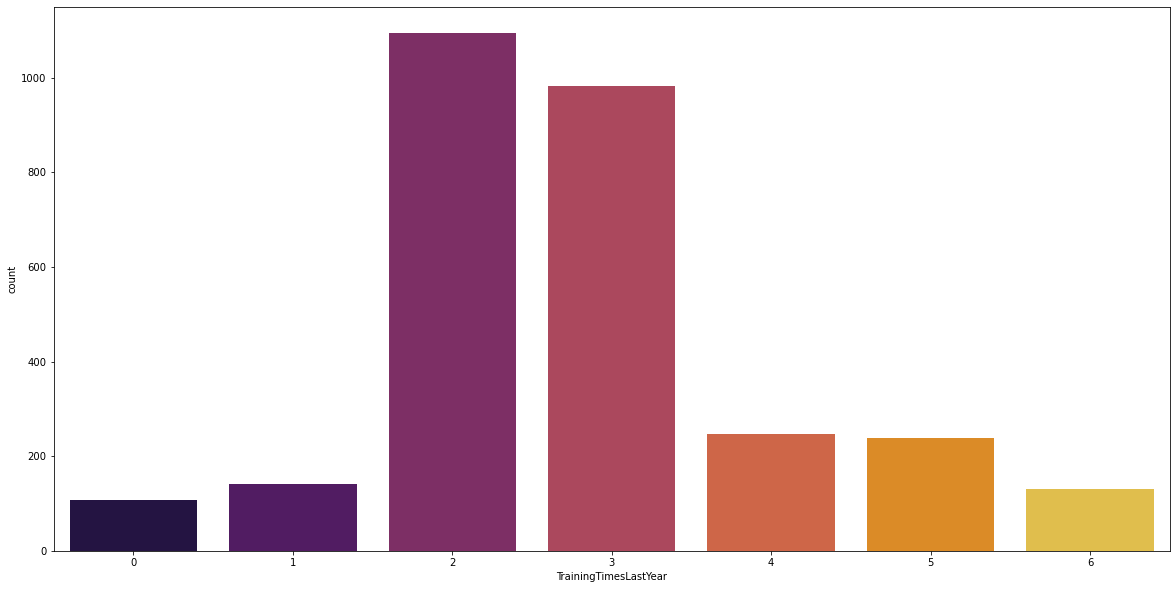

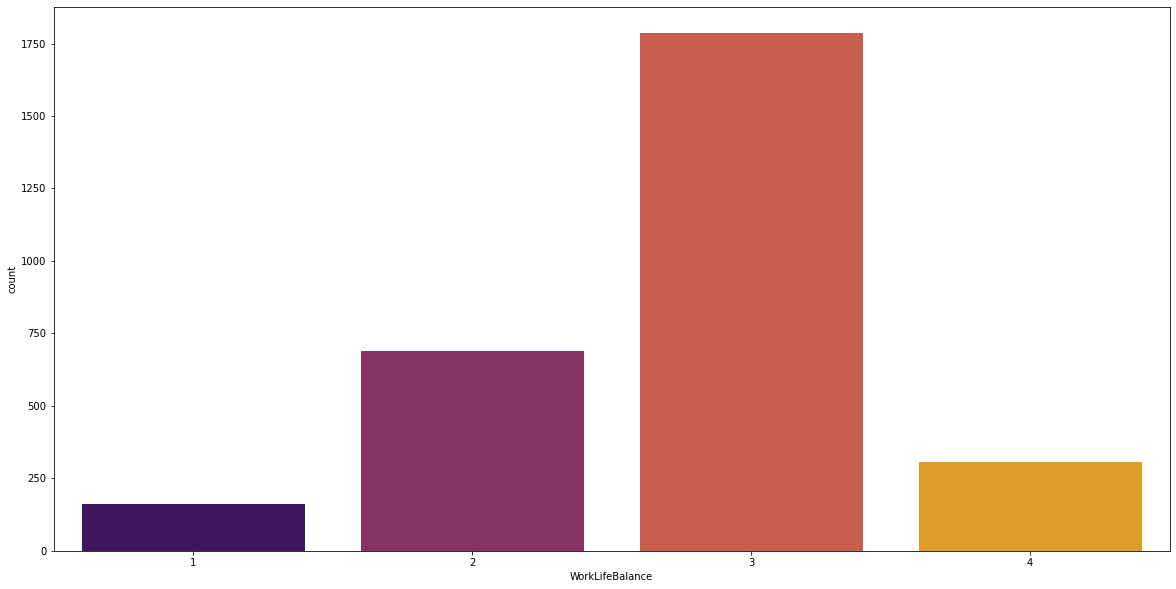

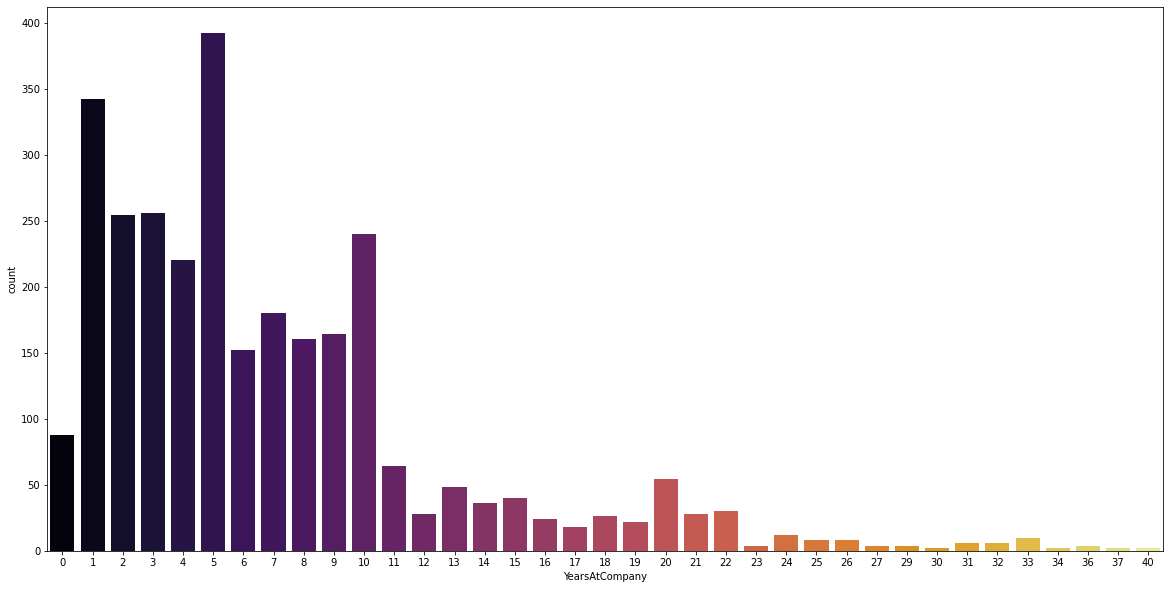

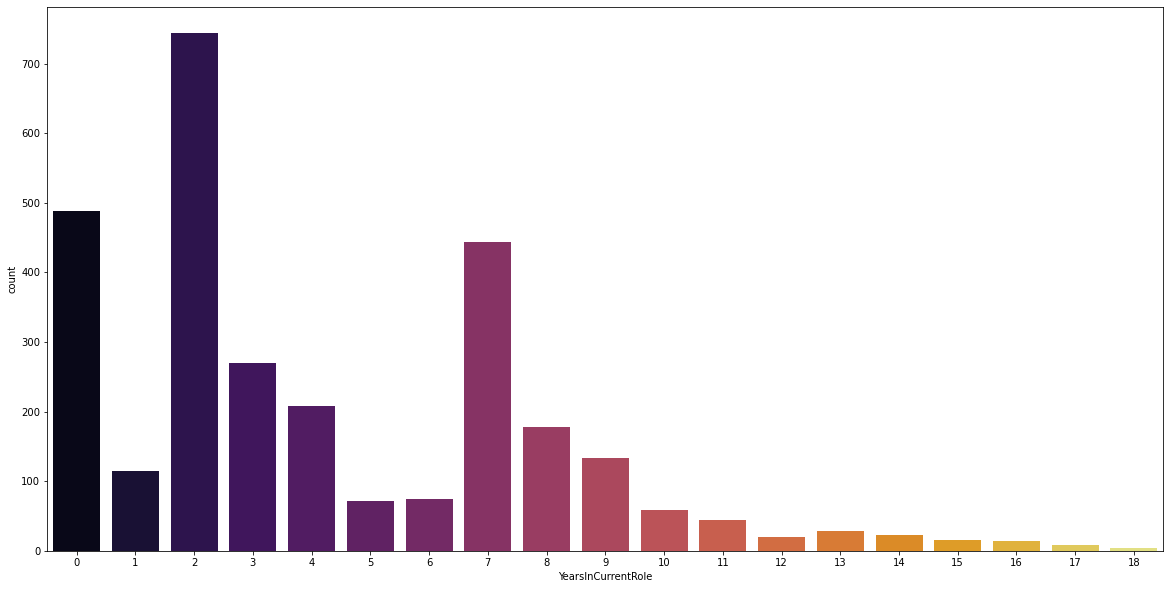

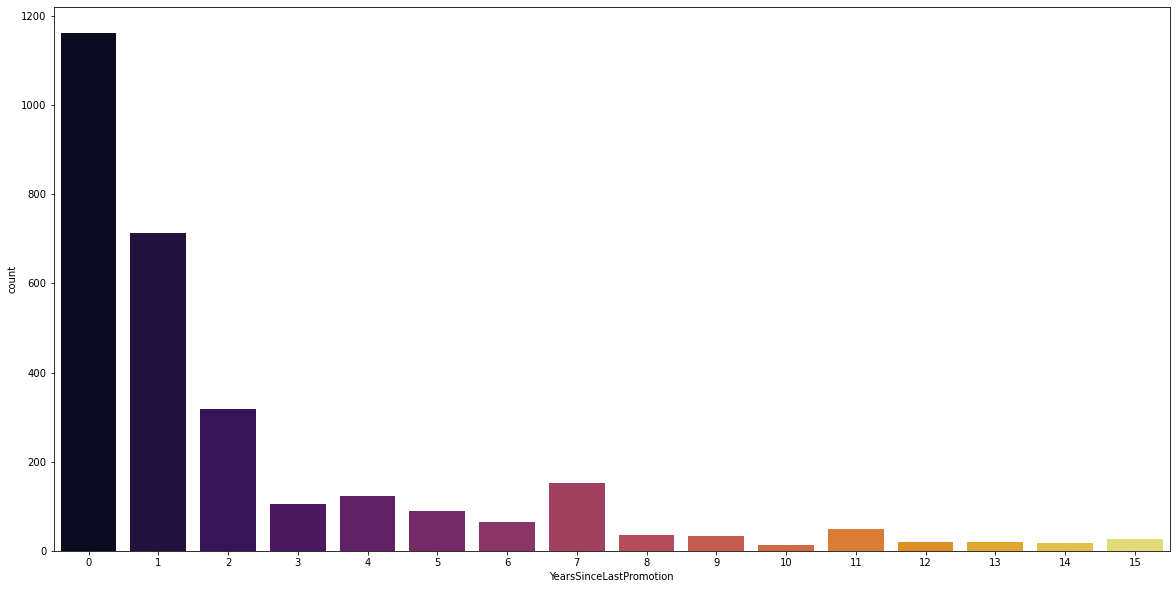

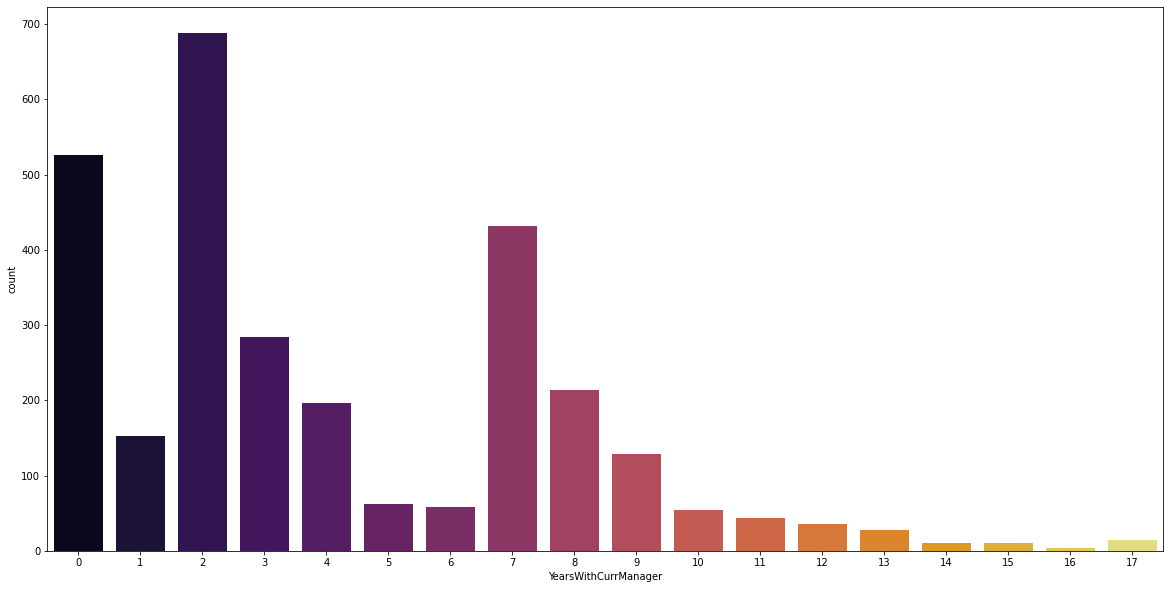

In [27]:
# Analyzing the numerical features

for x in ex_cols:
    plt.figure(figsize = (20,10))
    sns.countplot(df[x],data=df,palette = 'inferno')
    plt.show()

# Almost 60% Employees are within the range of Age 28-40.
# Employees tend to stay with 10 KM Radius of the office location.
# We prefer to hire candidates with atleast 1 year of experience.
# The Salary hike of the company usually varies between 11 - 14 percent.
# We have almost 67% Employees who have stayed in the company for 10 Years. We can approach on some inititatives to get more longibility.
# Around 70% employees have a good work life balance. However we can definitely work on the rest 30% to give the employees more reason to stay in the company.
# Employees usually stay 2 years in a current job role and then tend to move forward to a better oppurtunity within the company.

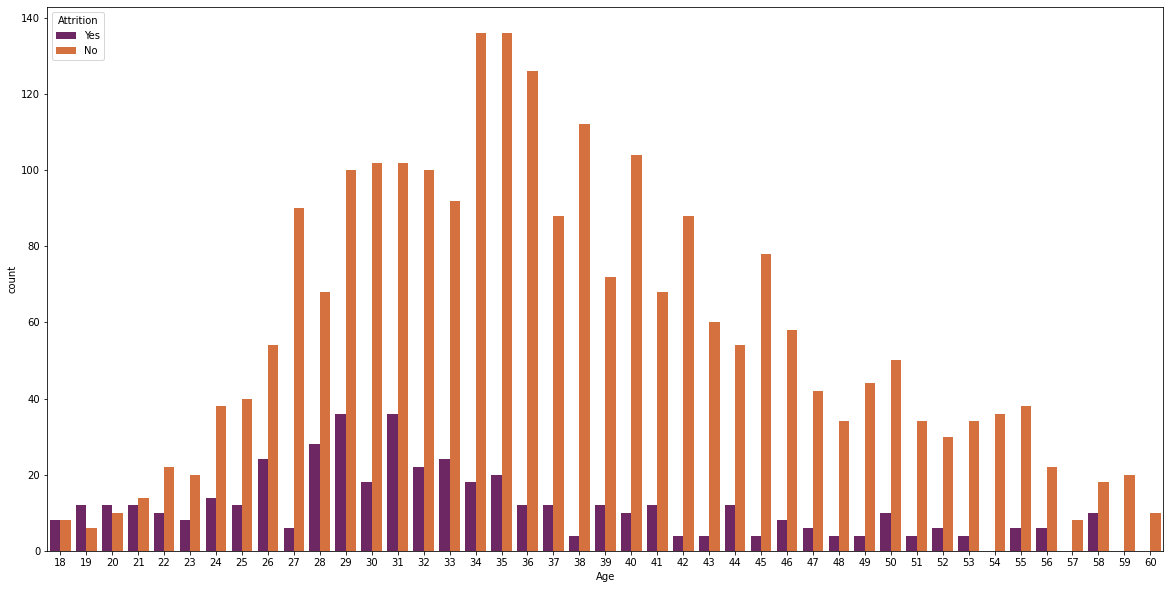

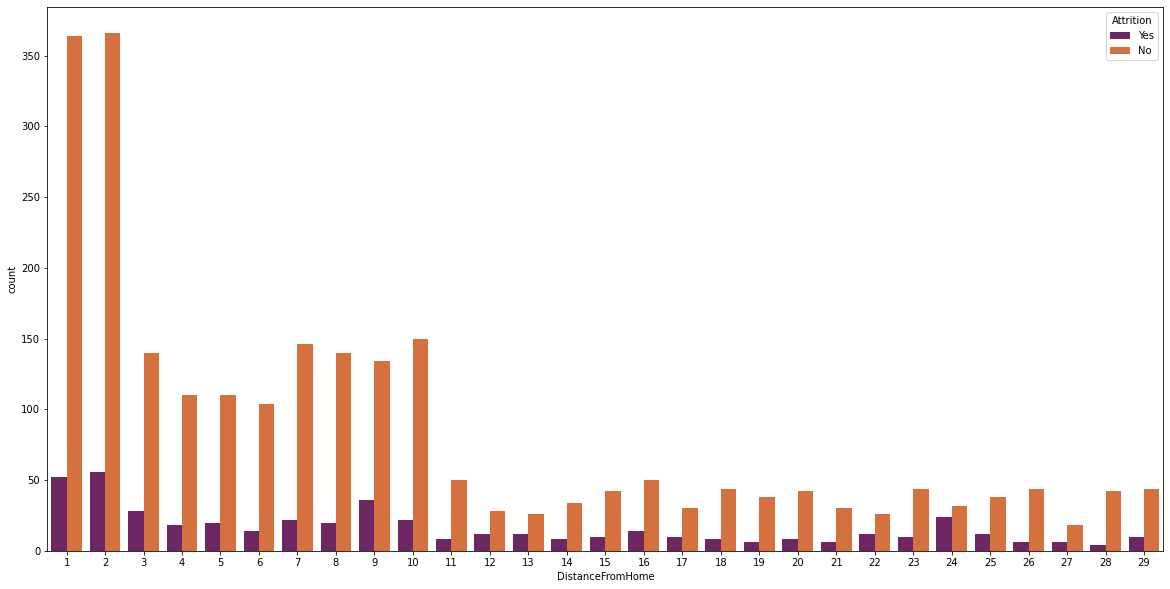

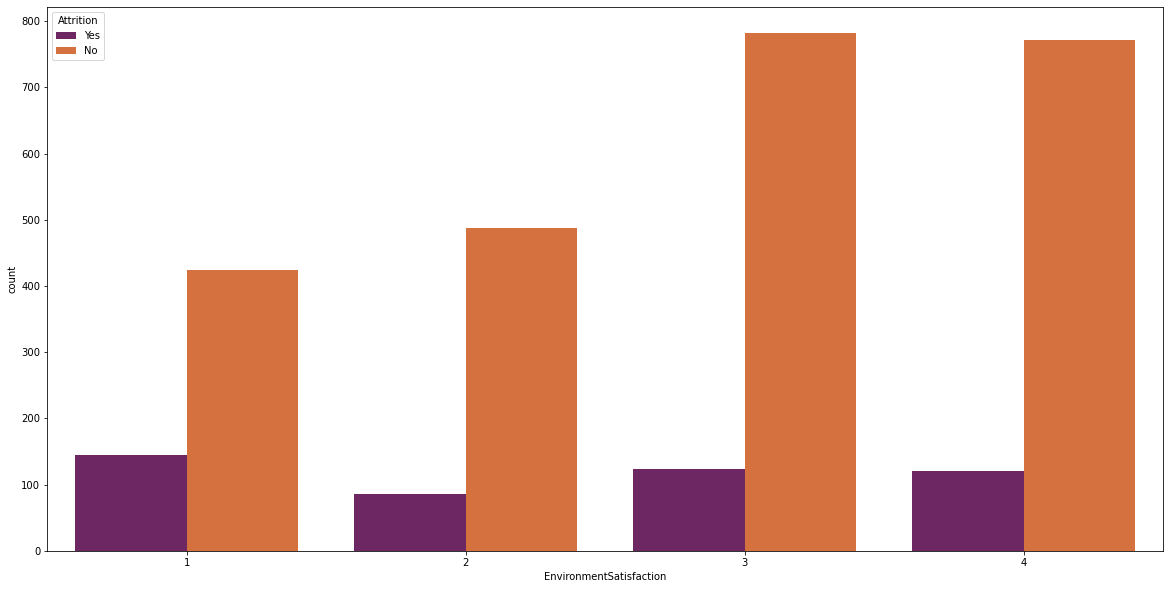

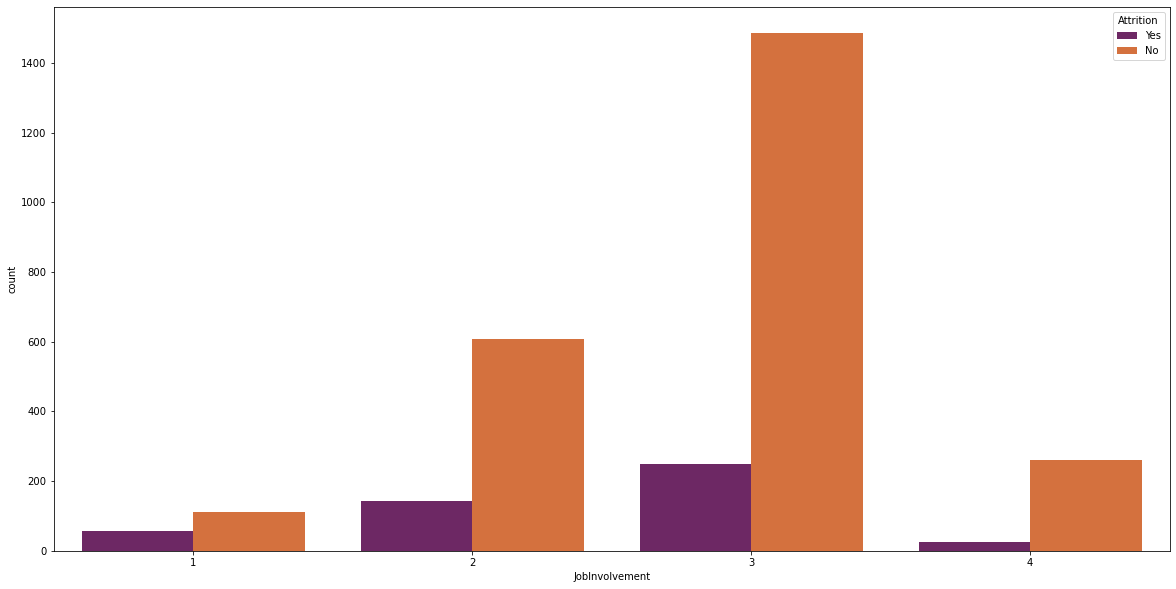

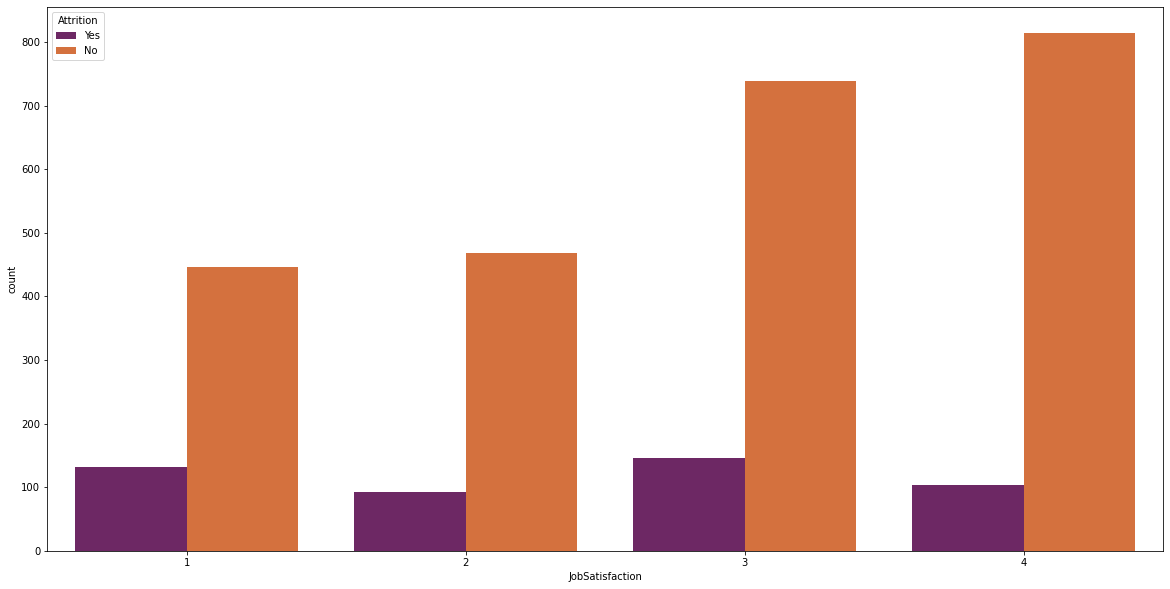

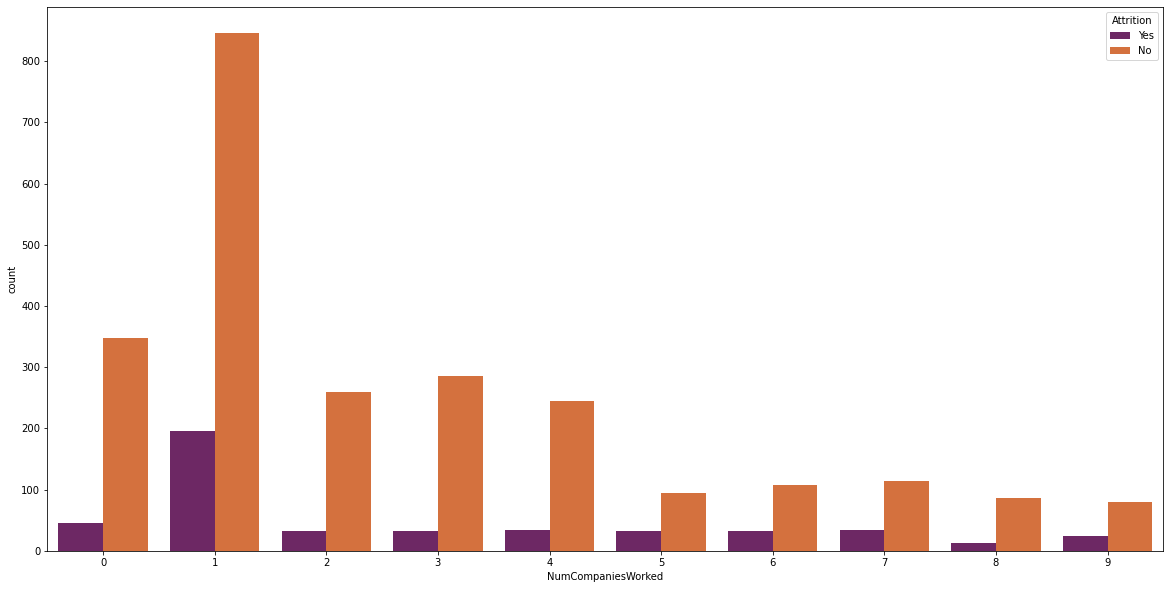

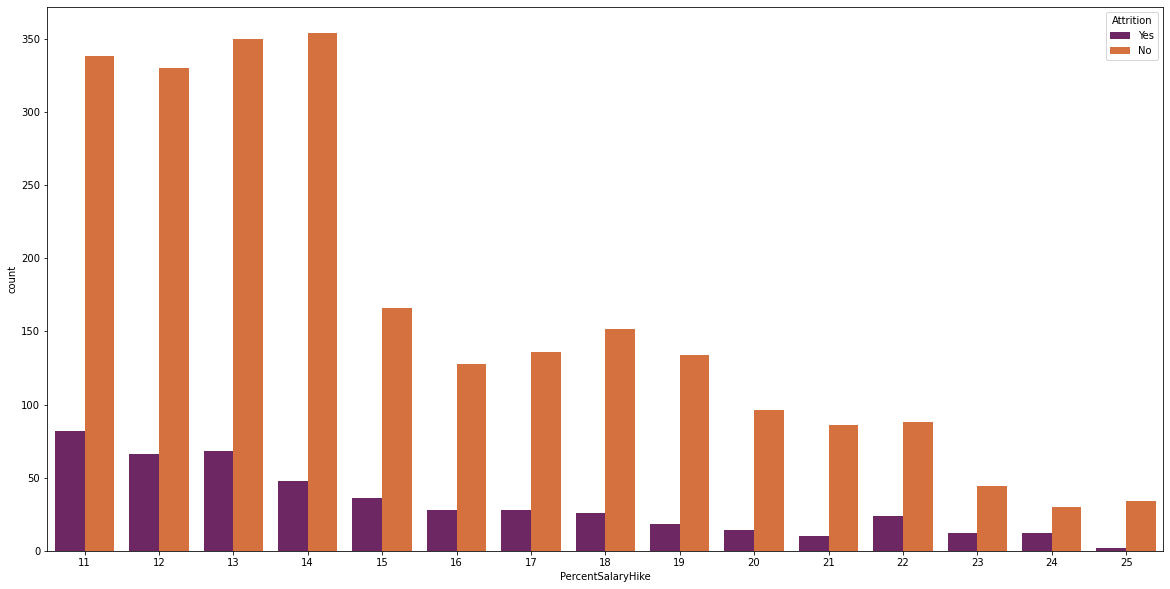

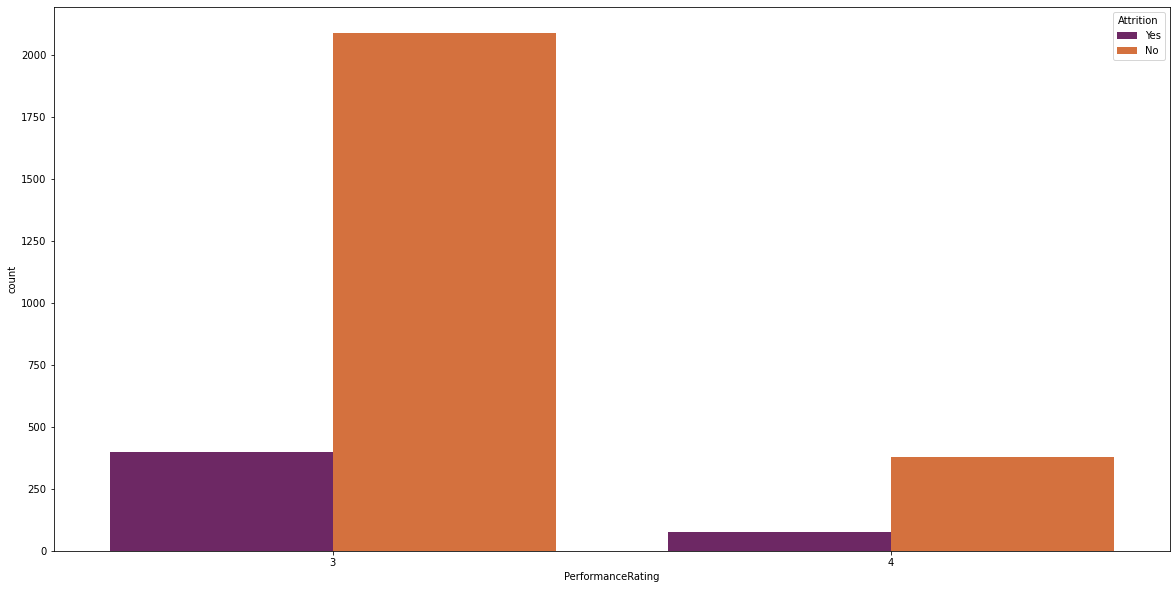

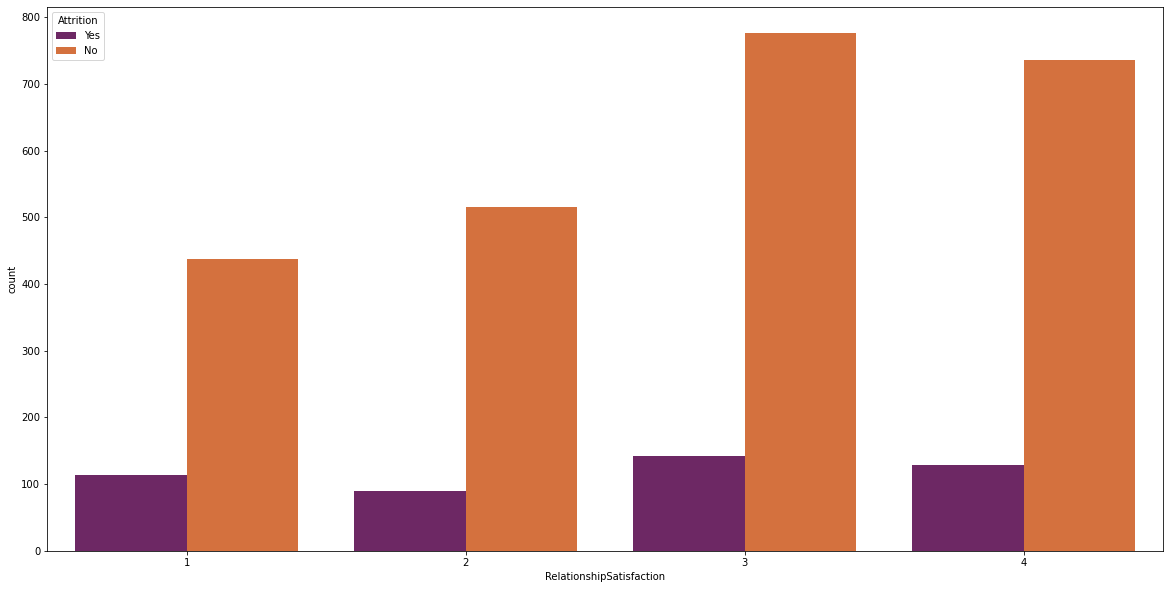

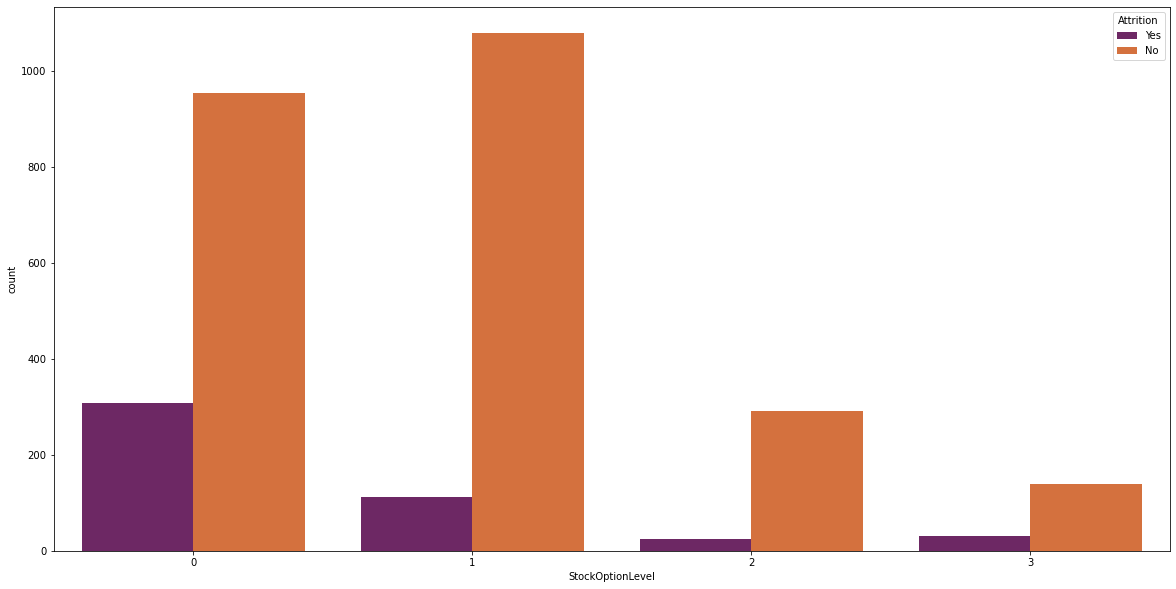

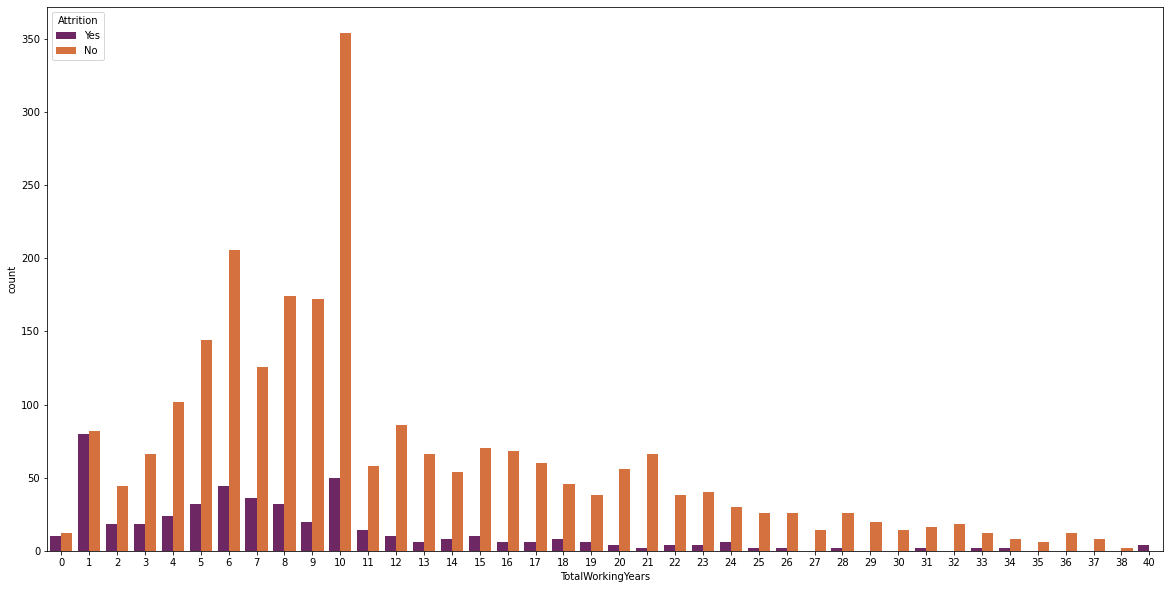

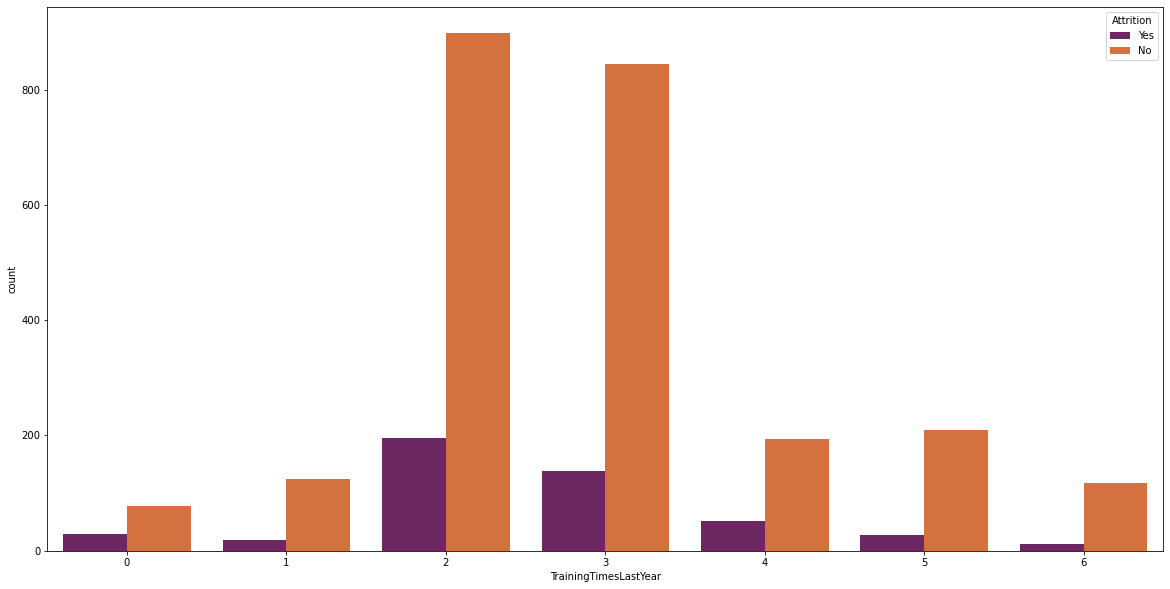

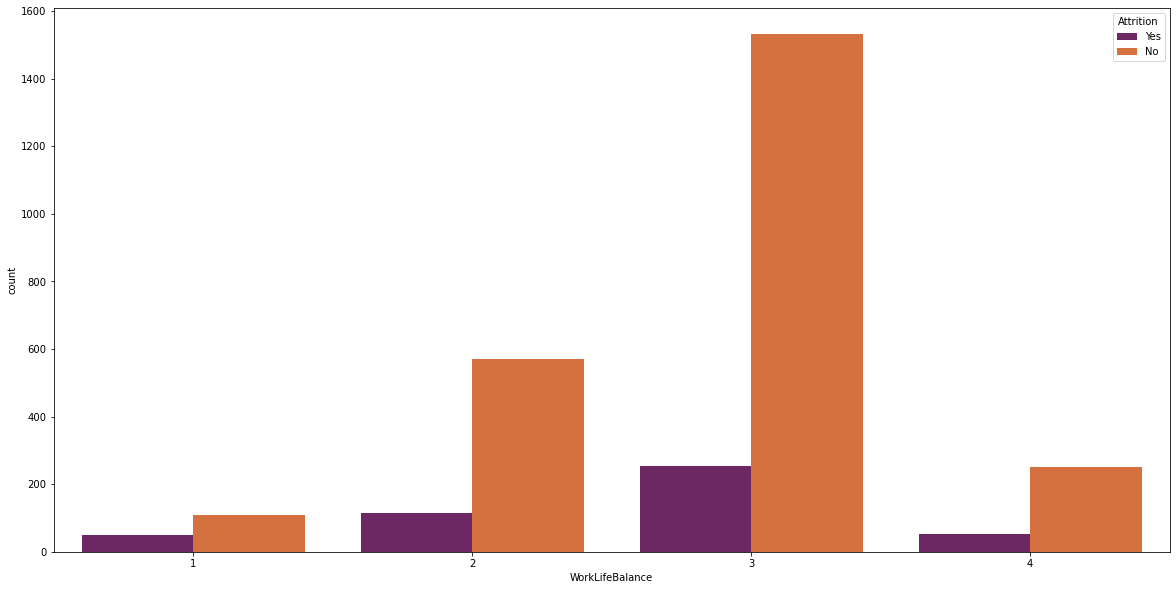

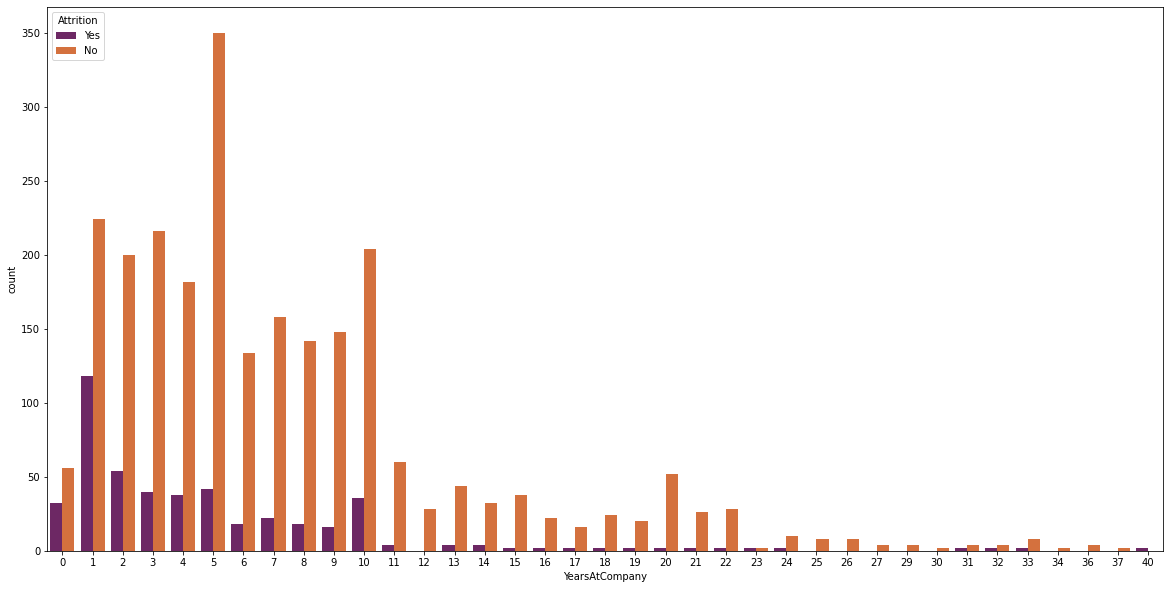

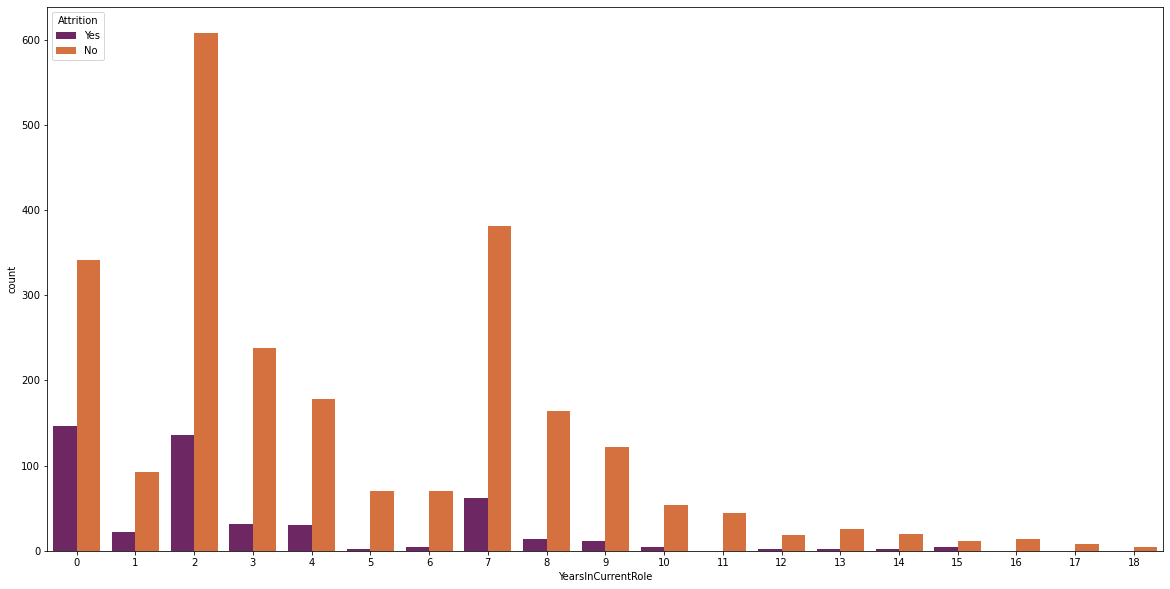

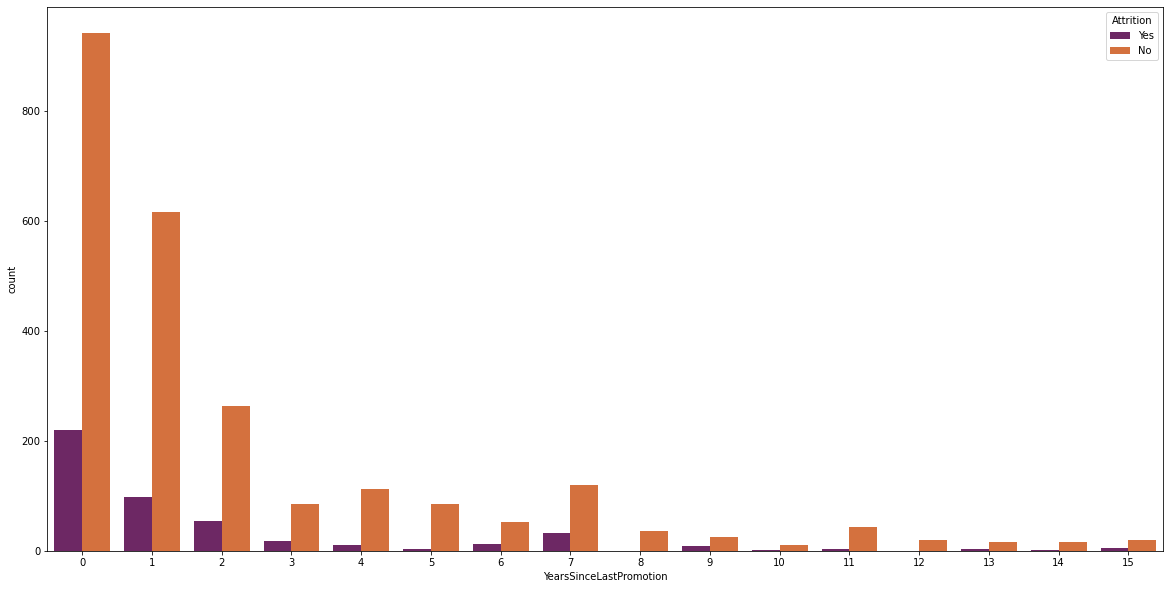

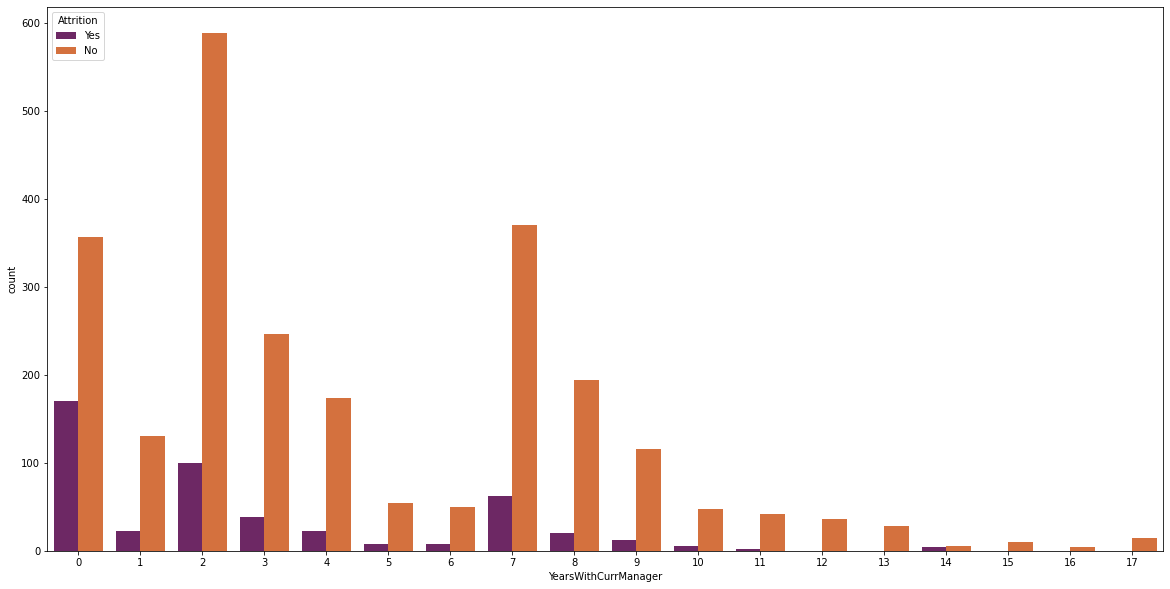

In [28]:
# Analyzing attrition on the numerical features

for x in ex_cols:
    plt.figure(figsize = (20,10))
    sns.countplot(df[x],hue = 'Attrition',data=df,palette = 'inferno')
    plt.show()

# The Age group where we face the higher Attrition is 28 -35.
# There is no signifiant effect between Attrition and the distance from Home to the office location as well as with the number of companies the employee has worked before.
# Needless to say, the percent of salary hike is dirrectly affecting the decision of an Employee on the same company. Employees with more than 15% hike is being loyal to the company.
# Surprising observation that employees seems to leave the company only within the first 5 years. On previous diagrams we have seen that the hike percentage gets higher after 5 years of experience and loyalt.
# Employees with mediocre Work Life Balance are leaving the company.
# It seems after spending 2 years either getting a new oppurtunity internally( as shown previously) or they switch the company.
# In a weird way after spending 7 years with the Current Manager the employees have a higher attrition rate than usual.
# There is high attrition rate for employees not receiving a promotion for 7 years
# Lower Environment is also a leading cause for higher attrition.

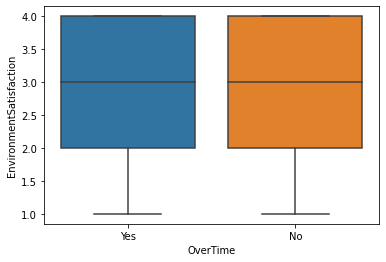

In [29]:
sns.boxplot(data = df, x = 'OverTime', y = 'EnvironmentSatisfaction')

# It seems like the employees are satisfied with the environment while working overtime also.

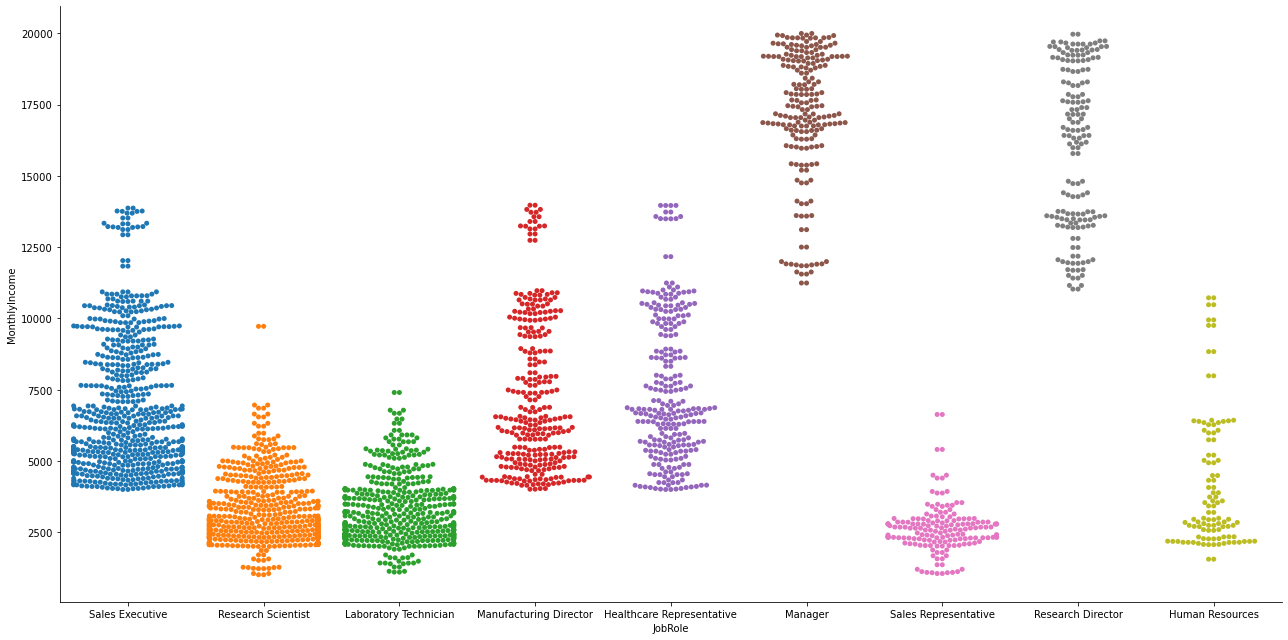

In [30]:
sns.catplot(data = df, x = 'JobRole', y = 'MonthlyIncome', kind = 'swarm', aspect = 2, height = 9)

# The monthly income of Manager and Research Director is much higher as comapred to other job roles.

'The monthly income of Female employees are a little higher than the male employees.'

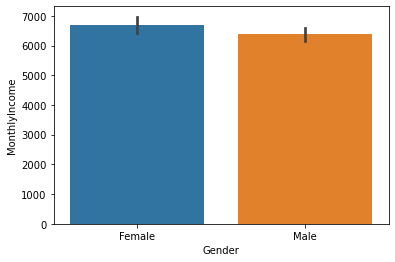

In [31]:
sns.barplot(data = df, x = 'Gender', y = 'MonthlyIncome')

"The monthly income of Female employees are a little higher than the male employees."

'The Company starts paying the employees higher gradually respective to the time they spend with the company.'

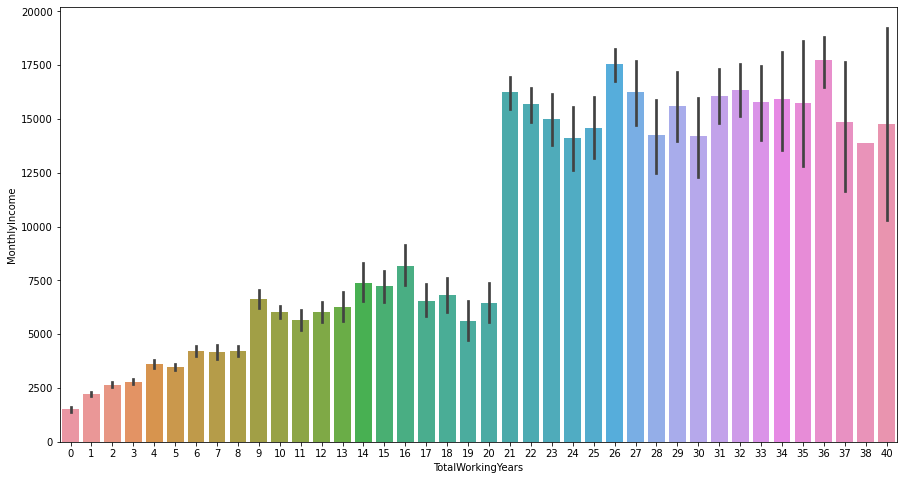

In [32]:
plt.figure(figsize = (15,8))

sns.barplot(data = df, x = 'TotalWorkingYears', y = 'MonthlyIncome')

"The Company starts paying the employees higher gradually respective to the time they spend with the company."

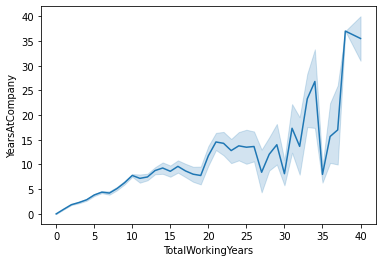

In [33]:
sns.lineplot(data=df, x="TotalWorkingYears", y="YearsAtCompany")

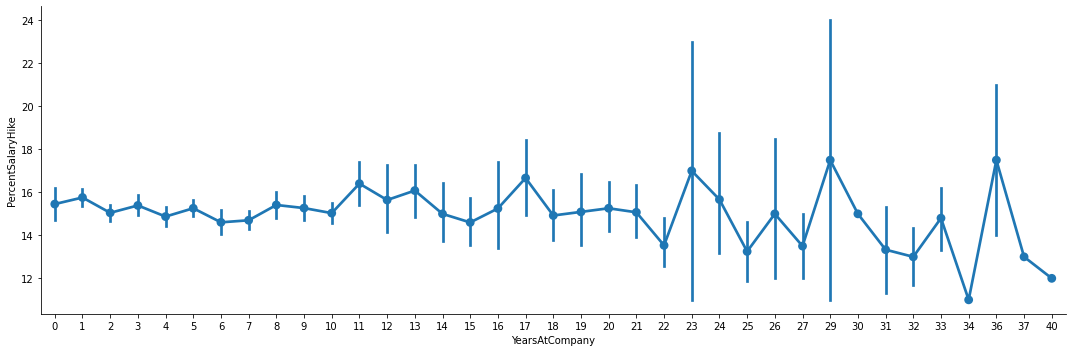

In [34]:
sns.catplot(data = df, y = 'PercentSalaryHike', x = 'YearsAtCompany', aspect =3, kind = 'point')

# "The employees get almost a stagnant hike for the first 10 years they with the company however the hike is better 
# around 23 years with the company."

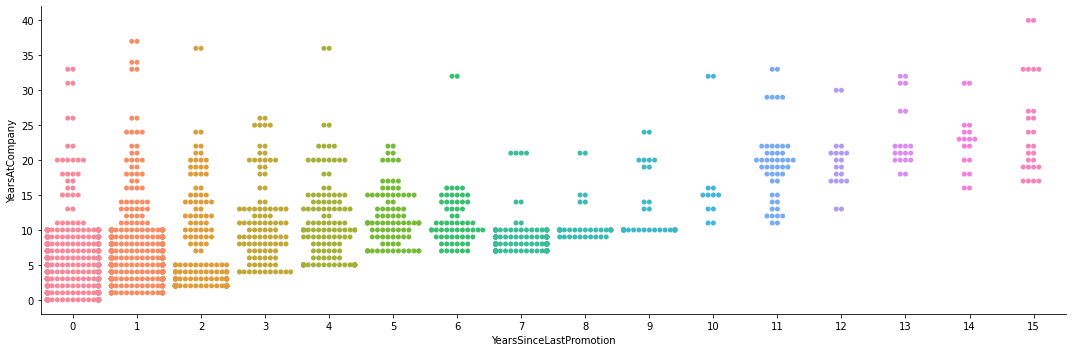

In [35]:
sns.catplot(data = df, x = 'YearsSinceLastPromotion', y = 'YearsAtCompany',kind = 'swarm', aspect = 3)

In [64]:
# target column
target_col = df['Attrition']

In [65]:
# columns with only two unique values
bin_cols = df.nunique()[df.nunique() == 2].keys().tolist()

In [66]:
# Let's encode the binary values
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

In [67]:
# Now let's transform categorical data into dummies
dummy_col = [column for column in df.drop(['Attrition', 'Gender', 'OverTime'],axis = 1).columns if df[column].nunique()< 20]
df = pd.get_dummies(df, columns = dummy_col, drop_first = True)

In [68]:
print(df.shape)

(2940, 132)


In [69]:
# Let's divide dataset x and y
x = df.drop(['Attrition'], axis = 1)
y = df['Attrition']
print(x.shape)
print(y.shape)

(2940, 131)
(2940,)


In [70]:
# Now, let's split our dataset into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 40)

# Let's check the shape of our training and testing datasets
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(2058, 131)
(2058,)
(882, 131)
(882,)


In [71]:
#Standard scaling for the training Data set

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

# Using Random Forest Algorithm

In [72]:
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 40)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=40)

In [73]:
np.random.seed(40)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(rfc, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None}
Time taken in grid search:  651.93


In [74]:
# Set best parameters given by grid search 

rfc.set_params(criterion = 'gini',
                  max_features = None, 
                  max_depth = 4)

RandomForestClassifier(max_depth=4, max_features=None, n_estimators=1000,
                       random_state=40)

In [75]:
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, max_features=None, n_estimators=1000,
                       random_state=40)

In [76]:
# Let's predict our test data
y_test_pred = rfc.predict(x_test)

In [77]:
#Accuracy score of Training set on the Dataset

print('Accuracy Score of Training Set: ', rfc.score(x_train, y_train))

Accuracy Score of Training Set:  0.8892128279883382


In [78]:
#Accuracy score of Testing set on the Dataset

print('Accuracy Score of Testing set: ', rfc.score(x_test, y_test))

Accuracy Score of Testing set:  0.8684807256235828


In [79]:
# Confusion Matrix

print(confusion_matrix(y_test, y_test_pred))

[[725  17]
 [ 99  41]]


In [80]:
from sklearn.svm import SVC
svm_model= SVC()

In [53]:
#tuning the parameters to get the best parameter for SVM

tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }

In [54]:
#Applying the hypertuned parameters on SVM to get better result

from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [55]:
#Fetching the accuracy score on the basis of the model

model_svm.fit(x_train, y_train)
print(model_svm.best_score_)

0.9533364906464599


In [58]:
print(model_svm.best_params_)

{'C': 0.1, 'degree': 3, 'gamma': 0.04, 'kernel': 'poly'}


In [61]:
#Checkimmg the accuracy score with the best parameters in SVM

from sklearn import metrics

svc=SVC(C= 0.1, degree =3, gamma = 0.04, kernel= 'poly')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9478458049886621
